<a href="https://colab.research.google.com/github/adikalamaro/reto1/blob/master/deep_procjet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
from tqdm import tqdm
import cv2
import os
import shutil
import itertools
import imutils
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils import shuffle
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import pandas as pd
from tensorflow.keras.utils import to_categorical, plot_model
import numpy
from numpy import argmax
from numpy import mean
from numpy import std
from numpy import expand_dims
from sklearn.metrics import accuracy_score
from keras.datasets.cifar10 import load_data
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import layers
from keras.models import Model, Sequential
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping

In [ ]:
!pip install tensorflow keras

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **Data Importing**

In [ ]:
#install kaggle

!pip install -q kaggle

In [ ]:
from  google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mornataf","key":"4573cb7bbc4dde506b7555638e25b0ee"}'}

In [ ]:
#creat a kaggle folder

! mkdir ~/.kaggle

In [ ]:
# copy the kaggle.json to folder created

! cp kaggle.json ~/'.kaggle'

In [ ]:
#premission for the json to act

! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# to list all datasets in kaggle

! kaggle datasets list

ref                                                         title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/countries-of-the-world-2023                Global Country Information Dataset 2023           23KB  2023-07-08 20:37:33           5778        203  1.0              
alphiree/cardiovascular-diseases-risk-prediction-dataset    Cardiovascular Diseases Risk Prediction Dataset    5MB  2023-07-03 12:12:19           6696        252  1.0              
arnavsmayan/netflix-userbase-dataset                        Netflix Userbase Dataset                          25KB  2023-07-04 07:38:41           7069        133  1.0              
joebeachcapital/top-10000-spotify-songs-1960-now            Top 10000 Songs on Spotify 1960-Now

In [ ]:
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

 84% 73.0M/86.8M [00:00<00:00, 106MB/s] 
100% 86.8M/86.8M [00:00<00:00, 109MB/s]


In [ ]:
!unzip brain-tumor-classification-mri.zip

Archive:  brain-tumor-classification-mri.zip
  inflating: Testing/glioma_tumor/image(1).jpg  
  inflating: Testing/glioma_tumor/image(10).jpg  
  inflating: Testing/glioma_tumor/image(100).jpg  
  inflating: Testing/glioma_tumor/image(11).jpg  
  inflating: Testing/glioma_tumor/image(12).jpg  
  inflating: Testing/glioma_tumor/image(13).jpg  
  inflating: Testing/glioma_tumor/image(14).jpg  
  inflating: Testing/glioma_tumor/image(15).jpg  
  inflating: Testing/glioma_tumor/image(16).jpg  
  inflating: Testing/glioma_tumor/image(17).jpg  
  inflating: Testing/glioma_tumor/image(18).jpg  
  inflating: Testing/glioma_tumor/image(19).jpg  
  inflating: Testing/glioma_tumor/image(2).jpg  
  inflating: Testing/glioma_tumor/image(20).jpg  
  inflating: Testing/glioma_tumor/image(21).jpg  
  inflating: Testing/glioma_tumor/image(22).jpg  
  inflating: Testing/glioma_tumor/image(23).jpg  
  inflating: Testing/glioma_tumor/image(24).jpg  
  inflating: Testing/glioma_tumor/image(25).jpg  
  infl

# **Data Preperation**

**Data Loading**

In [ ]:
# Multi label

labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

In [ ]:
X = []
y = []
image_size = 150

# Iterate over the files in the folder
for i in labels:
    folderPath = os.path.join('/content/Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X.append(img)  # Append the image array to the list of images
        y.append(i) # Append label name

# Iterate over the files in the folder
for i in labels:
    folderPath = os.path.join('/content/Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X.append(img)
        y.append(i)

# Convert the lists to numpy arrays
X = np.array(X)
y = np.array(y)

100%|██████████| 74/74 [00:00<00:00, 223.28it/s]


**Visualization of the dataset**

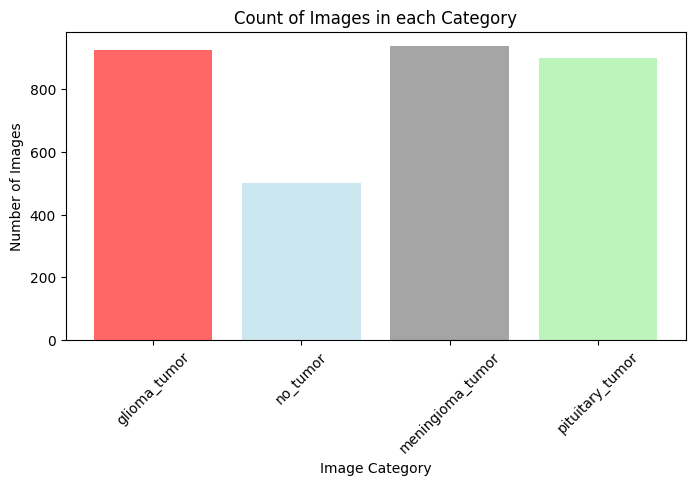

In [ ]:
# Create a bar chart

# Convert the NumPy array to a pandas Series
l = list(y)
category_sizes = np.array([l.count(j) for j in labels])
colors = ['red', 'lightblue', 'dimgrey', 'lightgreen']
plt.figure(figsize=(8, 4))
plt.bar(labels, category_sizes, color=colors, alpha=0.6)
plt.xlabel('Image Category')
plt.ylabel('Number of Images')
plt.title('Count of Images in each Category')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the chart
plt.show()



In [ ]:
#Shuffeling the images so won't be significant to oreder

X, y = shuffle(X,y, random_state=111)
print(X.shape)

(3264, 150, 150, 3)


**Data Cleaning**

In [ ]:
import os
from PIL import Image

def is_image_corrupted(image_path):
    try:
        Image.open(image_path).verify()
        return False
    except (IOError, SyntaxError):
        return True

def clean_image_dataset(dataset_dir):
    cleaned_dataset = []
    for root, _, filenames in os.walk(dataset_dir):
        for filename in filenames:
            image_path = os.path.join(root, filename)
            if not is_image_corrupted(image_path):
                cleaned_dataset.append(image_path)
            else:
                print(f"Corrupted image found: {image_path}")
    return cleaned_dataset

# Example usage:
# Assuming `dataset_dir` is the main directory path containing subfolders with images

# Clean the image dataset
cleaned_X = clean_image_dataset('/content/Training')
cleaned_y = clean_image_dataset('/content/Testing')

# Now, `cleaned_dataset` contains the paths of the valid, non-corrupted image files across all subfolders


! - We can see that the size of the total cleaned dataset is equal to the original one, so there is no corrupted images.

In [ ]:
print(len(cleaned_X)+len(cleaned_y))
print(X.shape[0])

3264
3264


**Splitting the Data**

In [ ]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training set further into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)


**Pixel Normalization**

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val= X_val.astype('float32')

In [ ]:
# We want the values to be between 0 to 1

X_train = X_train/255
X_test = X_test/255
X_val = X_val/255

**Sample Images**

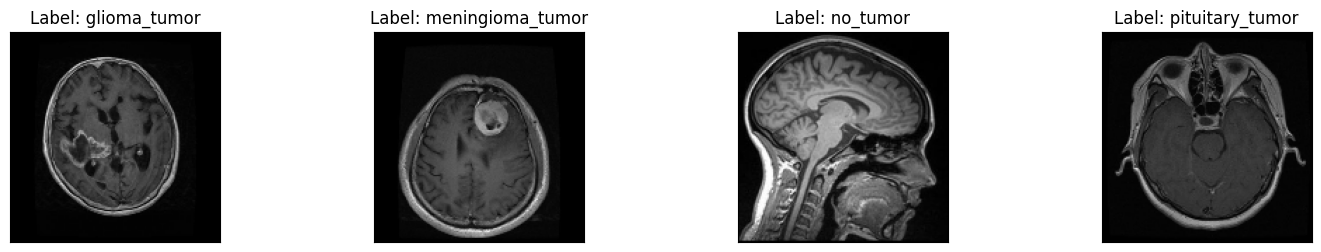

In [ ]:
import matplotlib.pyplot as plt

n = 4
categories = np.unique(y_test)  # Get unique categories from y_test

plt.figure(figsize=(18, 6))
for i, category in enumerate(categories):
    # Find the index of the first image in the current category
    category_indices = np.where(y_test == category)[0]
    first_image_index = category_indices[0]

    # Display the first image from the current category
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[first_image_index])
    plt.title(f'Label: {y_test[first_image_index]}')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


**Image Size - Resampling**

In [ ]:
import os
import cv2

def check_resample(dataset, target_size):
    resample_required = False
    for i in dataset:
        if (i.shape[0],i.shape[1]) != target_size:
                resample_required = True
                break
    return resample_required

resample_needed = check_resample(X_test, (150,150))

if resample_needed:
    print("Resampling is required.")
else:
    print("No resampling is needed.")


No resampling is needed.


In [ ]:
y_train.shape

(2349,)

**Categorial Target - Transformation**

We decided to use OnehotEncoder to numeric the target without giving significant values for the label categories.

In [ ]:
y_train = y_train.reshape(-1, 1)  # Reshape to a column vector
one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit(y_train)
y_train = one_hot_encoder.transform(y_train).toarray()

y_val = y_val.reshape(-1, 1)  # Reshape to a column vector
one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit(y_val)
y_val = one_hot_encoder.transform(y_val).toarray()

In [ ]:
y_test = y_test.reshape(-1, 1)  # Reshape to a column vector
one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit(y_test)
y_test = one_hot_encoder.transform(y_test).toarray()

In [ ]:
y_train.shape

(2349, 4)

**Data Augmentation**

We want to generate additional training examples by applying random transformations like rotations, translations, and flips to the existing images. This helps increase the model's robustness and generalization.

In [ ]:
# Create an instance of the ImageDataGenerator with desired augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.35,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest')

# Flow and augment the images from the training set
train_generator = datagen.flow(X_train, y_train, batch_size=32)

In [ ]:
# Create an ImageDataGenerator for validation (without data augmentation)
val_datagen = ImageDataGenerator()

# Create a batch iterator for validation
val_generator = val_datagen.flow(X_val, y_val, batch_size=32)


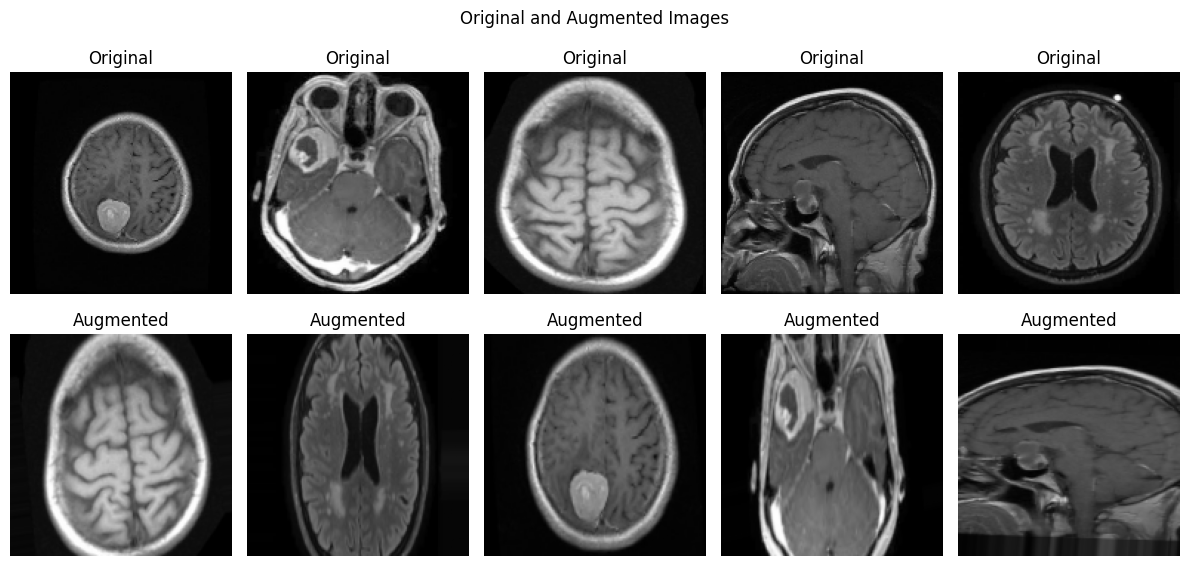

In [ ]:
# Generate augmented images from a subset of the original data
augmented_images = datagen.flow(X_train[:5], batch_size=1)

# Display the original and augmented images
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
fig.suptitle('Original and Augmented Images')

# Display original images
for i in range(5):
    axs[0, i].imshow(X_train[i], cmap='gray')
    axs[0, i].axis('off')
    axs[0, i].set_title('Original')

# Display augmented images
for i in range(5):
    augmented_image = next(augmented_images)[0]
    axs[1, i].imshow(augmented_image.squeeze(), cmap='gray')
    axs[1, i].axis('off')
    axs[1, i].set_title('Augmented')

plt.tight_layout()
plt.show()

In [ ]:
!pip install opencv-python

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Use this to display images in Colab

def apply_otsu_threshold_with_roi(image_path, roi_coords):
    # Load the MRI brain image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        raise ValueError("Error loading the image. Please check the file path.")

    # Unpack the ROI coordinates
    roi_x, roi_y, roi_width, roi_height = roi_coords

    # Ensure the ROI coordinates are integers and within valid image dimensions
    roi_x, roi_y = int(roi_x), int(roi_y)
    roi_width, roi_height = int(roi_width), int(roi_height)

    # Crop the image to retain only the ROI
    roi_image = image[roi_y:roi_y + roi_height, roi_x:roi_x + roi_width]

    # Apply Otsu's thresholding to the ROI
    _, binary_mask = cv2.threshold(roi_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    if binary_mask is None:
        raise ValueError("Error applying Otsu's thresholding. The ROI might be too uniform.")

    return binary_mask

if __name__ == "__main__":
    # Replace 'path/to/your/image.jpg' with the actual path to your MRI brain image
    image_path = 'path/to/your/image.jpg'

    # Assuming the tumor is small and occupies a region at the center of the 155x155 image
    tumor_size = 30
    roi_x = (155 // 2) - (tumor_size // 2)
    roi_y = (155 // 2) - (tumor_size // 2)

    # Define the ROI coordinates as (x, y, width, height)
    roi_coords = (roi_x, roi_y, tumor_size, tumor_size)

    try:
        # Apply Otsu's method for thresholding within the ROI
        binary_mask = apply_otsu_threshold_with_roi(image_path, roi_coords)

        # Display the original image and the binary mask side by side
        original_image = cv2.imread(image_path)
        roi_mask = np.zeros_like(original_image)
        roi_mask[roi_y:roi_y + tumor_size, roi_x:roi_x + tumor_size] = cv2.cvtColor(binary_mask, cv2.COLOR_GRAY2BGR)
        stacked_images = np.hstack((original_image, roi_mask))

        cv2_imshow(stacked_images)  # Use this instead of cv2.imshow() in Colab
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    except Exception as e:
        print(f"An error occurred: {str(e)}")


An error occurred: Error loading the image. Please check the file path.


# **Model 1 - CNN**

**Architacture**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

  # Define the CNN architecture
model = tf.keras.Sequential()

  # Convolutional layers (con, pooling, dropout)

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.1))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.1))

  # Flatten the feature maps
model.add(layers.Flatten())

  # Fully connected layers
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))

  # Output layer for multi-class classification
model.add(layers.Dense(4, activation='softmax'))

  # Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 64)        0

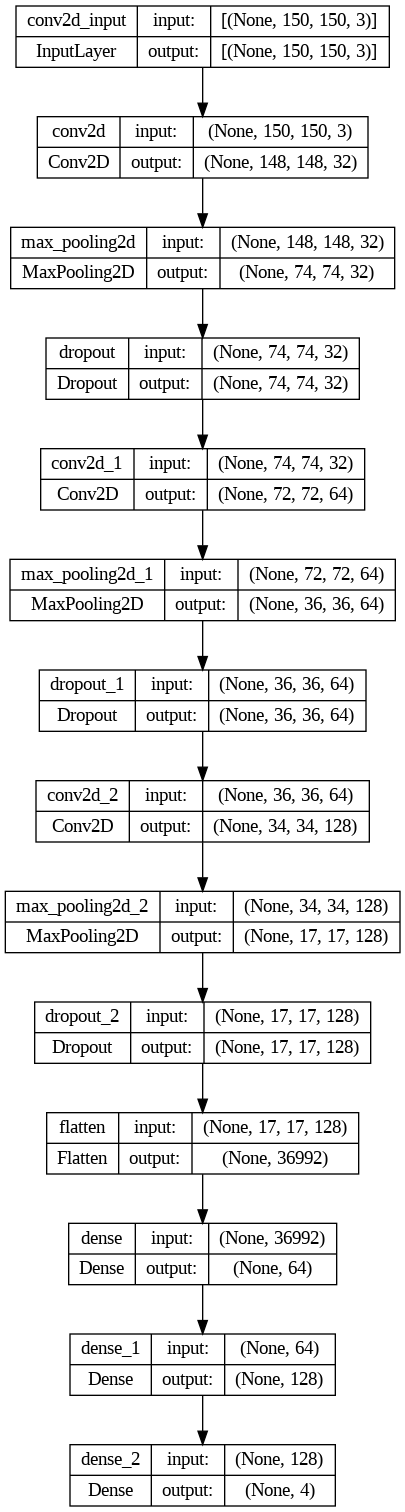

In [ ]:
plot_model(model,  show_layer_names=True, show_shapes=True)

In [ ]:
import numpy as np
from sklearn.model_selection import KFold

K = 2
kf = KFold(n_splits=K, shuffle=True, random_state=42)

**Fitting**

In [ ]:
batch_size = 32
epochs = 9

Fold 1/2
Epoch 1/9
37/37 [==============================] - 46s 1s/step - loss: 0.2251 - accuracy: 0.9208 - val_loss: 0.1824 - val_accuracy: 0.9353
Epoch 2/9
37/37 [==============================] - 45s 1s/step - loss: 0.0979 - accuracy: 0.9625 - val_loss: 0.0950 - val_accuracy: 0.9634
Epoch 3/9
37/37 [==============================] - 45s 1s/step - loss: 0.0326 - accuracy: 0.9906 - val_loss: 0.0848 - val_accuracy: 0.9745
Epoch 4/9
37/37 [==============================] - 46s 1s/step - loss: 0.0229 - accuracy: 0.9932 - val_loss: 0.0895 - val_accuracy: 0.9719
Epoch 5/9
37/37 [==============================] - 45s 1s/step - loss: 0.0371 - accuracy: 0.9847 - val_loss: 0.1098 - val_accuracy: 0.9634
Epoch 6/9
37/37 [==============================] - 45s 1s/step - loss: 0.0350 - accuracy: 0.9872 - val_loss: 0.1398 - val_accuracy: 0.9532
Epoch 7/9
37/37 [==============================] - 45s 1s/step - loss: 0.0153 - accuracy: 0.9949 - val_loss: 0.1173 - val_accuracy: 0.9574
Epoch 8/9
37/37 [=

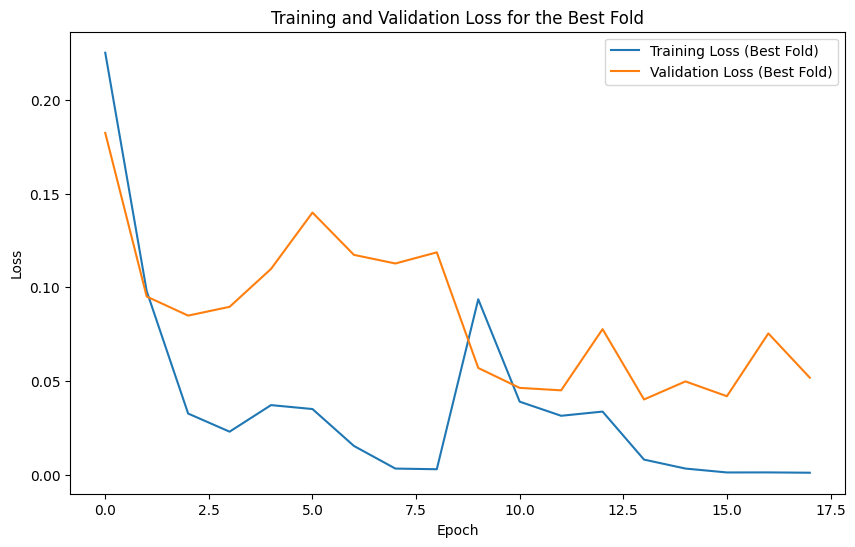

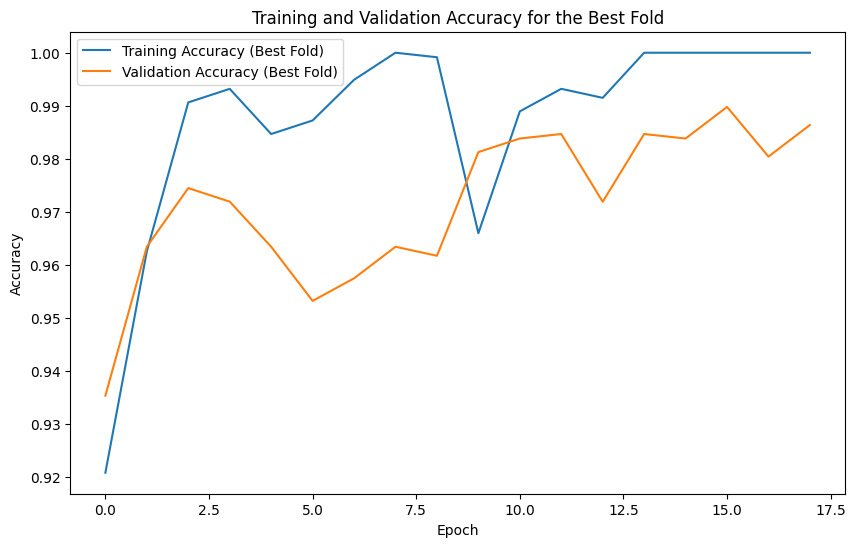

Best Fold: 2 with Validation Accuracy: 0.9863713979721069


In [ ]:
import matplotlib.pyplot as plt

# Initialize variables to track the best fold and its performance
best_fold = -1
best_val_accuracy = 0.0

# Initialize lists to store training and validation loss and accuracy for the best fold
train_loss_best_fold = []
val_loss_best_fold = []
train_accuracy_best_fold = []
val_accuracy_best_fold = []

for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f"Fold {fold + 1}/{K}")
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Train the model on the current fold
    history = model.fit(
        X_train_fold,
        y_train_fold,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(X_val_fold, y_val_fold),
        verbose=1
    )

    # Store history for the current fold
    train_loss_best_fold.extend(history.history['loss'])
    val_loss_best_fold.extend(history.history['val_loss'])
    train_accuracy_best_fold.extend(history.history['accuracy'])
    val_accuracy_best_fold.extend(history.history['val_accuracy'])

    # Track the best fold based on validation accuracy
    if history.history['val_accuracy'][-1] > best_val_accuracy:
        best_fold = fold
        best_val_accuracy = history.history['val_accuracy'][-1]

    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Test Accuracy for Fold {fold + 1}: {test_accuracy}")

# Plot training and validation loss for the best fold
plt.figure(figsize=(10, 6))
plt.plot(train_loss_best_fold, label='Training Loss (Best Fold)')
plt.plot(val_loss_best_fold, label='Validation Loss (Best Fold)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss for the Best Fold')
plt.show()

# Plot training and validation accuracy for the best fold
plt.figure(figsize=(10, 6))
plt.plot(train_accuracy_best_fold, label='Training Accuracy (Best Fold)')
plt.plot(val_accuracy_best_fold, label='Validation Accuracy (Best Fold)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy for the Best Fold')
plt.show()

print(f"Best Fold: {best_fold + 1} with Validation Accuracy: {best_val_accuracy}")

In [ ]:
batch_size=128
steps_per_epoch = len(X_train)//batch_size
model.fit(X_train, y_train, epochs=3, batch_size=steps_per_epoch, verbose=0)

In [ ]:
y_val.shape

(262, 4)

In [ ]:
model.evaluate_generator(X_val,y_val)

<ipython-input-68-9904e29869c0>:1: UserWarning:

`Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.



ValueError: ignored

In [ ]:

# define the cnn model for the cifar10 dataset
def define_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.1))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.1))

    model.add(layers.Flatten())

    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))

    model.add(layers.Dense(4, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# prediction using test-time augmentation
def tta_prediction(datagen, model, image, n_examples):
    steps_per_epoch = len(X_train)//batch_size
    samples = expand_dims(image, 0)
    it = datagen.flow(samples, batch_size=128,shuffle=False)
    yhats = model.predict(it, steps=n_examples, verbose=0)
    print(yhats.shape)
    summed = numpy.sum(yhats, axis=0)
    print(summed)
    print(argmax(summed))
    print("******")
    return argmax(summed)

# evaluate a model on a dataset using test-time augmentation
def tta_evaluate_model(model, testX, testY):
    datagen = ImageDataGenerator(
        rotation_range=15,
        zoom_range=0.35,
        horizontal_flip=True,
        vertical_flip=False,
        fill_mode='nearest'
    )
    n_examples_per_image = 7
    yhats = list()
    for i in range(len(testX)):
        yhat = tta_prediction(datagen, model, testX[i], n_examples_per_image)
        yhats.append(yhat)
    testY_labels = argmax(testY, axis=1)
    acc = accuracy_score(testY_labels, yhats)
    return acc

# fit and evaluate a defined model
def evaluate_model(model, trainX, trainY, testX, testY):
    model.fit(trainX, trainY, epochs=3, batch_size=128, verbose=0)
    acc = tta_evaluate_model(model, testX, testY)
    return acc

# repeatedly evaluate model, return distribution of scores
def repeated_evaluation(trainX, trainY, testX, testY, repeats=10):
    scores = list()
    for _ in range(repeats):
        model = define_model()
        accuracy = evaluate_model(model, trainX, trainY, testX, testY)
        scores.append(accuracy)
        print('> %.3f' % accuracy)
    return scores

trainX, trainY, testX, testY = X_train, y_train, X_test, y_test
scores = repeated_evaluation(trainX, trainY, testX, testY)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


(1, 4)
[0.5104753  0.23730882 0.19886638 0.05334952]
0
******
(1, 4)
[0.51602834 0.46447247 0.0128077  0.00669159]
0
******


(1, 4)
[0.11103173 0.12461613 0.06420261 0.70014954]
3
******
(1, 4)
[0.07673788 0.12300856 0.06254338 0.7377101 ]
3
******
(1, 4)
[0.4802536  0.36695015 0.13912512 0.01367114]
0
******


(1, 4)
[0.29502097 0.42758736 0.24019724 0.03719447]
1
******
(1, 4)
[0.40015793 0.4263504  0.13800287 0.03548883]
1
******


(1, 4)
[0.11799038 0.63884205 0.2033028  0.0398647 ]
1
******
(1, 4)
[0.21011068 0.437993   0.03706606 0.31483024]
1
******


(1, 4)
[0.23979229 0.4396238  0.26761162 0.05297229]
1
******
(1, 4)
[9.5839128e-02 4.4372550e-01 4.6018356e-01 2.5177302e-04]
2
******


(1, 4)
[0.3818696  0.14741027 0.05256004 0.41816002]
3
******
(1, 4)
[0.46754125 0.25798446 0.09822596 0.17624839]
0
******


(1, 4)
[0.15772384 0.78206044 0.04607337 0.01414238]
1
******
(1, 4)
[0.32192892 0.49781317 0.1356286  0.04462931]
1


******
(1, 4)
[0.12264283 0.13945824 0.05579062 0.6821083 ]
3
******


(1, 4)
[0.29022542 0.35181186 0.32766074 0.03030206]
1
******
(1, 4)
[0.12106363 0.34997827 0.48675233 0.04220577]
2
******


(1, 4)
[0.5503641  0.39798626 0.0293529  0.02229672]
0
******
(1, 4)
[0.3230034  0.5490332  0.08465599 0.04330734]
1
******


(1, 4)
[0.47113237 0.30274782 0.21422769 0.01189211]
0
******
(1, 4)
[0.08645344 0.6650459  0.2130502  0.03545049]
1
******


(1, 4)
[0.60761374 0.29336604 0.03097185 0.06804834]
0
******
(1, 4)
[0.03787264 0.02364751 0.01614389 0.922336  ]
3
******
(1, 4)
[0.0974355  0.30717373 0.186808   0.4085827 ]
3
******


(1, 4)
[0.09240343 0.2865208  0.56191915 0.05915658]
2
******
(1, 4)
[0.50467515 0.39273188 0.03205282 0.0705402 ]
0
******


(1, 4)
[0.17075534 0.19303638 0.18473126 0.451477  ]
3
******
(1, 4)
[0.4258546  0.18480559 0.05683481 0.33250502]
0
******


(1, 4)
[0.04767294 0.1639924  0.07538741 0.7129472 ]
3
******
(1, 4)
[0.31613743 0.2216162  0.10259712 0.3596492 ]
3
******


(1, 4)
[0.0927301  0.14823967 0.09529804 0.6637322 ]
3
******
(1, 4)
[0.51366377 0.3413846  0.12261239 0.0223393 ]
0
******


(1, 4)
[0.0202269  0.02674048 0.01362134 0.9394112 ]
3
******
(1, 4)
[0.18333367 0.32662994 0.06089384 0.4291425 ]
3
******


(1, 4)
[0.48013592 0.49709067 0.02161542 0.00115794]
1
******
(1, 4)
[0.16700165 0.49929872 0.30239236 0.03130728]
1
******


(1, 4)
[0.3500151  0.34536096 0.28535125 0.01927272]
0
******
(1, 4)
[0.542776   0.36703748 0.03025231 0.05993414]
0
******


(1, 4)
[0.501888   0.42976138 0.03159184 0.03675887]
0
******
(1, 4)
[0.33230034 0.13597575 0.05239071 0.47933325]
3
******


(1, 4)
[0.3044794  0.08491573 0.04766794 0.5629369 ]
3
******
(1, 4)
[0.07455157 0.44380075 0.46821734 0.01343042]
2
******


(1, 4)
[0.4890186  0.33943298 0.10763884 0.06390958]
0
******
(1, 4)
[0.29905125 0.659744   0.03924023 0.00196452]
1
******


(1, 4)
[0.22315787 0.52019364 0.22886023 0.02778828]
1
******
(1, 4)
[0.6211375  0.25278145 0.03708971 0.08899132]
0
******


(1, 4)
[0.52996737 0.36794594 0.10012149 0.0019652 ]
0
******
(1, 4)
[0.58937484 0.39764366 0.01132298 0.00165855]
0
******


(1, 4)
[0.14841583 0.4599011  0.30802214 0.08366087]
1
******
(1, 4)
[3.4828055e-01 6.3665462e-01 1.4787971e-02 2.7688502e-04]
1
******


(1, 4)
[0.06376415 0.11787087 0.03440886 0.7839561 ]
3
******
(1, 4)
[0.5259255  0.37618175 0.07542934 0.02246333]
0
******


(1, 4)
[0.17884311 0.43611276 0.31142202 0.07362211]
1
******
(1, 4)
[0.34467864 0.20363797 0.06796768 0.38371572]
3
******


(1, 4)
[0.325966   0.18446304 0.05764046 0.43193048]
3
******
(1, 4)
[0.46610835 0.41033834 0.08354698 0.04000635]
0
******


(1, 4)
[0.2763581  0.4356219  0.09521502 0.19280504]
1
******
(1, 4)
[0.5161529  0.34336498 0.02330508 0.11717708]
0
******


(1, 4)
[0.31273663 0.48703074 0.0284781  0.17175452]
1
******
(1, 4)
[1.2804928e-01 2.7100155e-01 6.0080302e-01 1.4613589e-04]
2
******


(1, 4)
[0.06356763 0.11039548 0.07013255 0.7559044 ]
3
******
(1, 4)
[0.5179743  0.230404   0.08319517 0.16842653]
0
******


(1, 4)
[0.54463327 0.42942035 0.01766537 0.00828097]
0
******
(1, 4)
[0.46176657 0.50556433 0.03144917 0.00121996]
1
******


(1, 4)
[0.28993037 0.42248386 0.2803108  0.00727501]
1
******
(1, 4)
[0.16633902 0.11979187 0.07982537 0.63404375]
3
******


(1, 4)
[0.44630402 0.24524908 0.2681878  0.04025919]
0
******
(1, 4)
[0.15879473 0.24327078 0.4804735  0.11746091]
2
******


(1, 4)
[0.26492554 0.29002285 0.4225595  0.02249215]
2
******
(1, 4)
[0.51047033 0.45139235 0.03396371 0.00417367]
0
******


(1, 4)
[0.08984472 0.16025399 0.7079405  0.04196075]
2
******
(1, 4)
[0.05791479 0.21750242 0.05113248 0.67345035]
3
******


(1, 4)
[0.15562764 0.55514294 0.28418097 0.00504849]
1
******
(1, 4)
[0.16433267 0.22358117 0.13802949 0.47405666]
3
******


(1, 4)
[0.24808219 0.5071265  0.23646936 0.00832203]
1
******
(1, 4)
[0.51322424 0.3792101  0.06400622 0.04355941]
0
******


(1, 4)
[0.49821556 0.32828882 0.10266756 0.07082804]
0
******
(1, 4)
[0.18326999 0.3152343  0.1505671  0.3509286 ]
3
******


(1, 4)
[0.43505424 0.5172202  0.04201144 0.00571417]
1
******
(1, 4)


[0.43890318 0.48074672 0.03283312 0.04751704]
1
******


(1, 4)
[0.28583094 0.43627444 0.08251274 0.19538182]
1
******


(1, 4)
[0.5139285  0.47156578 0.0104649  0.00404094]
0
******
(1, 4)
[0.13122922 0.13517924 0.09713651 0.636455  ]
3
******


(1, 4)
[0.08580375 0.13075674 0.04547946 0.7379601 ]
3
******


(1, 4)
[0.49611017 0.48447987 0.01418348 0.00522636]
0
******
(1, 4)
[0.38109457 0.5532107  0.06107237 0.00462243]
1
******


(1, 4)
[0.5255561  0.42844075 0.04126292 0.00474028]
0
******
(1, 4)
[0.13856235 0.3173371  0.10427306 0.4398276 ]
3
******


(1, 4)
[0.09645732 0.26450905 0.110024   0.5290097 ]
3
******
(1, 4)
[0.3643908  0.6033962  0.03097561 0.0012374 ]
1
******
(1, 4)
[0.3286783  0.41668382 0.23831058 0.01632731]
1
******


(1, 4)
[0.39709747 0.40650737 0.19454005 0.00185512]
1
******
(1, 4)
[0.22366816 0.33128142 0.14719735 0.29785308]
1
******


(1, 4)
[0.21290816 0.22515635 0.04533688 0.5165986 ]
3
******
(1, 4)
[0.54947805 0.3518742  0.06057485 0.03807291]
0
******
(1, 4)
[0.05425342 0.24183288 0.03947752 0.6644362 ]
3
******


(1, 4)
[0.16880168 0.16134588 0.11192783 0.55792457]
3
******
(1, 4)
[0.32492667 0.20751527 0.14831904 0.319239  ]
0
******


(1, 4)
[0.59787846 0.36791122 0.0089136  0.0252967 ]
0
******
(1, 4)
[0.14071457 0.19827184 0.59381604 0.06719751]
2
******
(1, 4)
[0.7236504  0.26104    0.00759378 0.00771582]
0
******


(1, 4)
[3.5203633e-01 6.3866925e-01 9.0577025e-03 2.3667444e-04]
1
******
(1, 4)
[0.27212262 0.63833326 0.0867298  0.00281433]
1
******


(1, 4)
[0.17354995 0.5204173  0.26174816 0.04428464]
1
******
(1, 4)
[0.10862168 0.679      0.19308056 0.01929769]
1
******


(1, 4)
[0.10002258 0.0430913  0.02837062 0.8285155 ]
3
******
(1, 4)
[0.1621992  0.26670757 0.5566169  0.0144763 ]
2
******
(1, 4)
[0.48166138 0.35066614 0.13955612 0.02811641]
0
******


(1, 4)
[0.46107173 0.32281634 0.17378107 0.04233091]
0
******
(1, 4)
[0.35053593 0.4332257  0.13789164 0.07834675]
1
******
(1, 4)


[3.1953007e-01 6.6296798e-01 1.7218150e-02 2.8380242e-04]
1
******
(1, 4)
[0.16569842 0.7136731  0.10498372 0.01564468]
1
******


(1, 4)
[0.30081436 0.26436365 0.10004491 0.33477706]
3
******
(1, 4)
[0.63673013 0.2927543  0.03616008 0.03435554]
0
******


(1, 4)
[0.12736435 0.3525706  0.46023476 0.05983021]
2
******
(1, 4)
[0.16116616 0.19818291 0.3434619  0.29718897]
2
******
(1, 4)
[0.18515675 0.2897227  0.26789322 0.25722727]
1
******


(1, 4)
[0.37129137 0.47456756 0.13889766 0.01524349]
1
******
(1, 4)
[0.27221143 0.19659495 0.07699432 0.4541993 ]
3
******


(1, 4)
[0.566904   0.33506066 0.09285249 0.00518287]
0
******
(1, 4)
[0.20945151 0.25960273 0.36716703 0.16377872]
2
******


(1, 4)
[0.33862084 0.21785173 0.06257643 0.380951  ]
3
******
(1, 4)
[0.3317565  0.47801396 0.18806395 0.00216565]
1
******


(1, 4)
[0.3859817  0.5249149  0.0790275  0.01007584]
1
******
(1, 4)
[0.16469316 0.13912527 0.10967655 0.58650506]
3
******


(1, 4)
[0.16651133 0.34133375 0.13941263 0.35274234]
3
******
(1, 4)
[0.5612872  0.41636854 0.01606435 0.00627985]
0
******


(1, 4)
[0.25337496 0.5786673  0.1428474  0.02511034]
1
******
(1, 4)
[0.01097898 0.02815744 0.01418829 0.9466753 ]
3
******


(1, 4)
[0.49634403 0.34706467 0.12834445 0.02824692]
0
******
(1, 4)
[0.12493163 0.4473596  0.41969773 0.00801103]
1
******


(1, 4)
[0.62804455 0.33770776 0.02128528 0.0129624 ]
0
******
(1, 4)
[0.49026182 0.39564374 0.0654828  0.04861171]
0
******


(1, 4)
[0.5282554  0.31286126 0.02758509 0.13129814]
0
******
(1, 4)
[0.21050978 0.24634233 0.09040252 0.4527454 ]
3
******


(1, 4)
[1.0666912e-01 8.2191604e-01 7.0805684e-02 6.0928433e-04]
1
******
(1, 4)
[0.6328423  0.31754047 0.04474296 0.0048743 ]
0
******


(1, 4)
[0.36389026 0.48513395 0.09815501 0.05282085]
1
******
(1, 4)
[0.29315844 0.39182872 0.17584406 0.13916866]
1
******
(1, 4)
[0.22699846 0.43932092 0.33221984 0.00146069]
1
******


(1, 4)
[0.32842246 0.44803625 0.00969542 0.2138459 ]
1
******
(1, 4)
[0.69409484 0.29509917 0.00710321 0.00370281]
0
******
(1, 4)
[0.4796762  0.43792576 0.07944407 0.00295399]
0
******


(1, 4)
[0.35232356 0.46248007 0.18164332 0.00355306]
1
******
(1, 4)
[0.53766423 0.41803616 0.0197805  0.02451912]
0
******


(1, 4)
[4.4956632e-02 4.3211973e-01 5.2258497e-01 3.3868558e-04]
2
******
(1, 4)
[0.10353611 0.4735676  0.1542509  0.26864532]
1
******


(1, 4)
[0.11403666 0.6236073  0.2581213  0.00423479]
1
******
(1, 4)
[0.18824624 0.5734692  0.02973533 0.20854922]
1
******


(1, 4)
[0.33020842 0.17139354 0.06332137 0.43507662]
3
******
(1, 4)
[0.45732942 0.45042053 0.08982738 0.00242266]
0
******
(1, 4)
[0.3623753  0.45925593 0.17327185 0.0050969 ]
1
******


(1, 4)
[0.2745399  0.36909264 0.35204047 0.00432701]
1
******
(1, 4)
[0.41746652 0.23970753 0.3034253  0.03940068]
0
******


(1, 4)
[0.14941667 0.18556312 0.1802815  0.4847387 ]
3
******
(1, 4)
[0.14380956 0.17692944 0.05997515 0.6192858 ]
3
******


(1, 4)
[0.34879887 0.4841255  0.1066693  0.06040636]
1
******
(1, 4)
[0.08310623 0.10004269 0.0425241  0.774327  ]
3
******


(1, 4)
[0.05352349 0.33263937 0.03196334 0.5818738 ]
3
******
(1, 4)
[0.18485607 0.4310115  0.05920319 0.3249292 ]
1
******


(1, 4)
[0.05222467 0.1756735  0.10304043 0.66906136]
3
******
(1, 4)
[0.32617152 0.3062356  0.35816827 0.00942464]
2
******


(1, 4)
[0.13446002 0.31030726 0.36507428 0.19015844]
2
******
(1, 4)
[0.6388043  0.28393996 0.03798716 0.03926859]
0
******
(1, 4)
[0.63263947 0.31779134 0.04387468 0.00569448]
0
******


(1, 4)
[0.13271394 0.45786536 0.34654692 0.06287383]
1
******
(1, 4)
[0.47916055 0.2572116  0.09154987 0.17207801]
0
******
(1, 4)
[0.69782835 0.28011194 0.01669521 0.0053645 ]
0
******


(1, 4)
[0.2607583  0.25318164 0.2836093  0.20245083]
2
******
(1, 4)
[0.05693105 0.2478413  0.68890554 0.00632208]
2
******
(1, 4)
[0.03952419 0.05920447 0.00983049 0.8914408 ]
3
******


(1, 4)
[0.4540578  0.5311103  0.01040349 0.00442847]
1
******
(1, 4)
[0.47202924 0.27938968 0.10495941 0.14362168]
0
******
(1, 4)
[0.55263144 0.35621133 0.03823808 0.05291912]
0
******


(1, 4)
[0.1989236  0.41846195 0.3688806  0.01373383]
1
******
(1, 4)
[0.4259131  0.14817367 0.21987541 0.20603783]
0
******
(1, 4)
[0.44332725 0.4454849  0.09958093 0.01160697]


1
******
(1, 4)
[0.1496556  0.13169989 0.09599746 0.62264705]
3
******


(1, 4)
[0.47528735 0.22997396 0.07368331 0.22105537]
0
******


(1, 4)
[2.7823651e-01 6.9696909e-01 2.4489446e-02 3.0492956e-04]
1
******


(1, 4)
[0.17592362 0.67222196 0.15062015 0.00123426]
1
******
(1, 4)
[0.11159542 0.25218317 0.14560391 0.49061754]
3
******


(1, 4)
[0.18403345 0.31534168 0.49626914 0.00435575]
2
******
(1, 4)
[0.5504918  0.30272475 0.06202416 0.08475921]
0
******


(1, 4)
[1.2876152e-01 8.3780664e-01 3.3278901e-02 1.5293814e-04]
1
******


(1, 4)
[0.24770206 0.14747201 0.09393167 0.5108942 ]
3
******
(1, 4)
[0.16196011 0.5310976  0.3010312  0.00591113]
1
******


(1, 4)
[0.2743669  0.64740294 0.03602207 0.04220808]
1
******
(1, 4)
[3.0942404e-01 6.5249693e-01 3.7524171e-02 5.5487733e-04]
1
******


(1, 4)
[0.2230996  0.12942117 0.04404752 0.6034317 ]
3
******
(1, 4)
[0.07222632 0.6563873  0.23051552 0.04087075]
1
******


(1, 4)
[0.3663727  0.41149682 0.04598415 0.17614636]
1
******
(1, 4)
[0.18307985 0.31506574 0.49784946 0.0040049 ]
2
******


(1, 4)
[0.5119564  0.4494658  0.02748176 0.01109607]
0
******
(1, 4)
[0.29399592 0.52333623 0.17919484 0.00347296]
1
******
(1, 4)
[0.63453466 0.29936334 0.05849092 0.00761096]
0
******


(1, 4)
[0.1856019  0.35480636 0.11479811 0.34479368]
1
******
(1, 4)
[0.19476318 0.5297902  0.25234514 0.02310144]
1
******


(1, 4)
[0.25364482 0.2218144  0.5091324  0.01540837]
2
******
(1, 4)
[4.2494929e-01 5.6694156e-01 7.8546619e-03 2.5445389e-04]
1
******


(1, 4)
[0.3069832  0.274234   0.39540806 0.02337478]
2
******
(1, 4)
[0.08070926 0.59434104 0.30956912 0.01538061]
1
******


(1, 4)
[4.9573760e-02 4.1178527e-01 5.3816581e-01 4.7521212e-04]
2
******
(1, 4)
[0.29672506 0.6347782  0.02313122 0.04536552]
1
******


(1, 4)
[0.58033586 0.3107109  0.06720684 0.04174634]
0
******
(1, 4)
[0.06875686 0.06404417 0.0309107  0.8362883 ]
3
******


(1, 4)
[0.08744685 0.1193287  0.04001615 0.7532083 ]
3
******
(1, 4)
[0.2091387  0.3419749  0.25592583 0.19296053]
1
******


(1, 4)
[0.16393913 0.12104857 0.1007173  0.61429507]
3
******
(1, 4)
[0.30713326 0.411667   0.19335458 0.08784527]
1
******


(1, 4)
[0.05868902 0.14128655 0.02129239 0.7787321 ]
3
******
(1, 4)
[0.4958458  0.34930068 0.05364432 0.10120919]
0
******


(1, 4)
[0.2692965  0.6428851  0.08601563 0.00180267]
1
******
(1, 4)
[0.4390212  0.3315061  0.11155022 0.11792248]
0
******
(1, 4)


[0.34759343 0.32721993 0.3221603  0.00302632]
0
******
(1, 4)
[0.4944988  0.4061589  0.08555969 0.01378274]
0
******


(1, 4)
[0.31508347 0.3660819  0.1699109  0.14892371]
1
******
(1, 4)
[0.15626413 0.280943   0.47296032 0.08983245]
2
******


(1, 4)
[0.51763463 0.41268265 0.03567855 0.03400419]
0
******
(1, 4)
[0.36111403 0.59553665 0.04170556 0.00164381]
1
******


(1, 4)
[0.27398247 0.17753384 0.14754958 0.4009342 ]
3
******
(1, 4)
[0.55985415 0.30673712 0.0615092  0.0718995 ]
0
******


(1, 4)
[0.62158245 0.3674541  0.00972865 0.0012348 ]
0
******
(1, 4)
[0.32945615 0.1055383  0.03092576 0.53407973]
3
******


(1, 4)
[0.67130375 0.31457186 0.01081719 0.00330728]
0
******
(1, 4)
[0.41639724 0.5306869  0.04196085 0.01095503]
1
******


(1, 4)
[0.6913169  0.26389575 0.02405013 0.02073728]
0
******
(1, 4)
[0.6942047  0.26331785 0.01667177 0.02580563]
0
******


(1, 4)
[0.76560706 0.18769692 0.02331203 0.023384  ]
0
******
(1, 4)
[0.15994768 0.7653784  0.07314291 0.00153106]
1
******


(1, 4)
[0.5224903  0.4440795  0.03039257 0.00303761]
0
******
(1, 4)
[0.48773354 0.35821474 0.03843252 0.11561926]
0
******
(1, 4)
[0.24594988 0.22538964 0.36329943 0.16536109]


2
******
(1, 4)
[0.23661798 0.31817603 0.44093558 0.00427039]
2
******


(1, 4)
[0.10335808 0.31238544 0.36047357 0.22378288]
2
******
(1, 4)
[0.5791052  0.37463665 0.04192556 0.00433262]
0
******


(1, 4)
[0.02475583 0.04756467 0.01711177 0.91056776]
3
******
(1, 4)
[0.18146603 0.60480076 0.20195217 0.0117811 ]
1
******


(1, 4)
[0.06704608 0.12821399 0.0432074  0.7615325 ]
3
******
(1, 4)
[0.5798493  0.38150877 0.01845683 0.02018509]
0
******


(1, 4)
[0.26860285 0.55224544 0.17297436 0.00617735]
1
******
(1, 4)
[0.30389887 0.6110451  0.03914851 0.04590746]
1
******


(1, 4)
[0.42952624 0.5489457  0.02090489 0.0006231 ]
1
******
(1, 4)
[0.44849434 0.5388087  0.01121599 0.00148091]
1
******


(1, 4)
[0.4186406  0.48692077 0.07256871 0.02186997]
1
******
(1, 4)
[0.48438627 0.47919255 0.02050547 0.01591563]
0
******


(1, 4)
[0.36518577 0.6216133  0.01239976 0.00080112]
1
******
(1, 4)
[0.14415042 0.34407318 0.46178427 0.04999204]
2
******


(1, 4)
[1.0413144e-01 8.2723200e-01 6.8185017e-02 4.5155486e-04]
1
******
(1, 4)
[0.39158908 0.32509622 0.19836682 0.08494782]
0
******


(1, 4)
[0.5298936  0.34693396 0.04938652 0.07378591]
0
******
(1, 4)
[0.34528708 0.4550342  0.17605871 0.02362005]
1
******


(1, 4)
[0.23481348 0.27425694 0.47842243 0.01250724]
2
******
(1, 4)
[0.667477   0.3017449  0.02433325 0.00644487]
0
******


(1, 4)
[0.19761398 0.49575683 0.30509168 0.00153756]
1
******
(1, 4)
[0.59728754 0.32764375 0.06357861 0.0114902 ]
0
******


(1, 4)
[0.26699296 0.54123926 0.06621567 0.1255522 ]
1
******
(1, 4)
[0.385932   0.4806805  0.11250293 0.02088457]
1
******
(1, 4)
[0.0232455  0.5367151  0.42303085 0.01700861]
1
******


(1, 4)
[0.6467063  0.33101746 0.01370846 0.00856782]
0
******
(1, 4)
[0.4476427  0.44434327 0.04609899 0.06191506]
0
******


(1, 4)
[0.10772095 0.12683621 0.04892055 0.7165223 ]
3
******
(1, 4)
[0.36275864 0.21437486 0.4086462  0.0142203 ]
2
******
(1, 4)
[0.32871753 0.5799967  0.09030044 0.00098533]
1
******


(1, 4)
[0.37272257 0.38471687 0.04841986 0.1941408 ]
1
******
(1, 4)
[0.28617075 0.20973216 0.31556344 0.18853359]
2
******
(1, 4)
[0.52971196 0.46035472 0.00925193 0.00068142]
0
******


(1, 4)
[0.5544882  0.29740986 0.11614725 0.03195464]
0
******
(1, 4)
[0.17965977 0.43843347 0.37382424 0.00808256]
1
******


(1, 4)
[0.26796624 0.34345928 0.19919229 0.18938218]
1
******
(1, 4)
[0.5125866  0.26338938 0.21349537 0.01052866]
0
******


(1, 4)
[0.22848687 0.46831647 0.280128   0.0230687 ]
1
******
(1, 4)
[0.13637458 0.26880038 0.05821392 0.53661114]
3
******


(1, 4)
[0.43006214 0.2906578  0.26775616 0.01152392]
0
******
(1, 4)
[0.3922288  0.5546748  0.05248573 0.00061064]
1
******


(1, 4)
[0.02475476 0.03563172 0.02368462 0.9159289 ]
3
******
(1, 4)
[0.43460295 0.51406056 0.02426556 0.02707097]
1
******


(1, 4)
[0.22034411 0.17690338 0.05481599 0.54793644]
3
******


(1, 4)
[0.5289641  0.45809296 0.00744592 0.005497  ]
0
******


(1, 4)
[0.40315866 0.5374802  0.05742417 0.00193694]
1
******
(1, 4)
[0.5334245  0.4268737  0.03798828 0.00171347]
0
******


(1, 4)
[0.42102048 0.33105648 0.23036455 0.01755847]
0
******
(1, 4)
[0.12334801 0.16345651 0.08930341 0.62389207]
3
******


(1, 4)
[0.18355003 0.15306835 0.06901862 0.594363  ]
3
******
(1, 4)
[0.10036875 0.41345686 0.07045364 0.4157208 ]
3
******


(1, 4)
[0.12612554 0.1414748  0.73010504 0.00229469]
2
******
(1, 4)
[0.5393553  0.3554131  0.04271545 0.06251612]
0
******


(1, 4)
[0.63683254 0.29635862 0.03638948 0.03041927]
0
******
(1, 4)
[0.08906545 0.08151112 0.07852708 0.7508964 ]
3
******


(1, 4)
[0.55147487 0.2676434  0.0335522  0.14732948]
0
******
(1, 4)
[0.3028198  0.40170154 0.02729958 0.26817903]
1
******
(1, 4)
[0.27524912 0.36745146 0.3544387  0.0028607 ]
1
******


(1, 4)
[0.27953503 0.64306813 0.02910964 0.04828718]
1
******
(1, 4)
[0.63829964 0.35123336 0.00971344 0.00075355]
0
******


(1, 4)
[0.06499657 0.1009028  0.03554161 0.79855907]
3
******
(1, 4)
[0.3688832  0.5787557  0.05167092 0.00069017]
1
******


(1, 4)
[0.524979   0.43461326 0.02831367 0.01209403]
0
******
(1, 4)
[0.02756949 0.7624759  0.20263103 0.00732359]
1
******


(1, 4)
[0.4253832  0.5150401  0.03075031 0.02882641]
1
******
(1, 4)
[0.100977   0.12428737 0.05579327 0.71894234]
3
******


(1, 4)
[0.40304175 0.5048446  0.07860399 0.01350955]
1
******
(1, 4)
[0.2757796  0.42336878 0.2820785  0.01877307]
1
******
(1, 4)
[0.58549577 0.31017193 0.0593795  0.04495288]
0
******


(1, 4)
[0.22243913 0.3841512  0.38081294 0.01259671]
1
******
(1, 4)
[0.17372397 0.55471    0.26290837 0.00865771]
1
******
(1, 4)


[0.19355622 0.15496704 0.03334731 0.6181294 ]
3
******
(1, 4)
[0.38296318 0.32453626 0.11965545 0.17284504]
0
******


(1, 4)
[0.32937017 0.5000413  0.12182887 0.04875971]
1
******
(1, 4)
[0.242791   0.6902259  0.05726675 0.00971636]
1
******
(1, 4)
[0.3397667  0.26796737 0.09594194 0.29632396]


0
******
(1, 4)
[0.21254507 0.72986126 0.03994306 0.01765049]
1
******


(1, 4)
[0.24579689 0.35645893 0.1156654  0.28207868]
1
******
(1, 4)
[0.07275461 0.41724667 0.50707775 0.002921  ]
2
******


(1, 4)
[0.5129817  0.3468514  0.12842607 0.01174086]
0
******
(1, 4)
[0.37687165 0.41944686 0.12097051 0.08271106]
1
******
(1, 4)
[0.16794547 0.28408203 0.49779657 0.05017587]
2
******


(1, 4)
[6.5231967e-01 3.4445533e-01 2.8516613e-03 3.7335110e-04]
0
******
(1, 4)
[0.18298237 0.6433451  0.17143838 0.0022341 ]
1
******
(1, 4)
[0.41901538 0.30680668 0.15087916 0.12329874]
0
******


(1, 4)
[0.45759824 0.51539403 0.0141836  0.01282409]
1
******
(1, 4)
[0.22222692 0.36439648 0.02774238 0.3856342 ]
3
******


(1, 4)
[0.28550294 0.4096321  0.22161035 0.08325467]
1
******
(1, 4)
[0.5229493  0.20302194 0.02731793 0.2467108 ]
0
******


(1, 4)
[0.5033102  0.450664   0.0429453  0.00308048]
0
******
(1, 4)
[0.39424604 0.37808135 0.1675287  0.06014395]
0
******


(1, 4)
[0.09811655 0.21926385 0.12002776 0.56259185]
3
******
(1, 4)
[0.5880793  0.35919106 0.02671436 0.0260153 ]
0
******


(1, 4)
[0.78814596 0.20588467 0.00349985 0.00246951]
0
******
(1, 4)
[0.22852609 0.40369684 0.2755401  0.09223699]
1
******
(1, 4)
[0.1656496  0.3366606  0.16900714 0.32868263]
1
******


(1, 4)
[0.24296784 0.4118341  0.13953486 0.20566322]
1
******


(1, 4)
[0.3911511  0.3520019  0.2560048  0.00084216]
0
******
(1, 4)
[0.36799103 0.5417904  0.07600152 0.01421711]
1
******


(1, 4)
[0.16437411 0.09108147 0.02730313 0.71724135]
3
******
(1, 4)
[0.31943515 0.21821626 0.06109767 0.40125084]
3
******
(1, 4)


[0.5166321  0.31230143 0.03214251 0.13892396]
0
******
(1, 4)
[0.2436733  0.31816846 0.08083998 0.35731834]
3
******


(1, 4)
[0.20832826 0.6286578  0.14827178 0.01474211]
1
******
(1, 4)
[0.15911634 0.28671357 0.1297067  0.42446342]
3
******


(1, 4)
[0.27012318 0.5411835  0.18652116 0.00217227]
1
******
(1, 4)
[0.3803319  0.315825   0.03569744 0.2681457 ]
0
******


(1, 4)
[0.4845533  0.45009187 0.04532124 0.0200336 ]
0
******
(1, 4)
[0.5015721  0.4442627  0.04814102 0.00602422]
0
******


(1, 4)
[0.5113139  0.42389816 0.01483788 0.04995015]
0
******
(1, 4)
[0.6213726  0.36156937 0.01235062 0.00470743]
0
******


(1, 4)
[0.32676482 0.2618949  0.30591658 0.10542367]
0
******
(1, 4)
[6.3791804e-02 7.3883754e-01 1.9707331e-01 2.9738300e-04]
1
******
(1, 4)


[0.4458063  0.5454122  0.00783391 0.00094763]
1
******
(1, 4)
[0.05361147 0.29420868 0.29969773 0.35248217]
3
******
(1, 4)
[0.5786883  0.40217254 0.01688979 0.0022493 ]
0
******


(1, 4)
[0.38739818 0.53770924 0.07127166 0.0036209 ]
1
******
(1, 4)
[0.28892097 0.6468994  0.06138635 0.00279327]
1
******


(1, 4)
[0.41022262 0.48233932 0.04570242 0.0617356 ]
1
******
(1, 4)
[0.29097494 0.36390144 0.18487354 0.16025011]
1
******


(1, 4)
[0.3765892  0.5331756  0.04163914 0.04859606]
1
******
(1, 4)
[0.5138722  0.3993079  0.08519799 0.00162187]
0
******


(1, 4)
[0.36175737 0.57500494 0.05746987 0.00576777]
1
******
(1, 4)
[0.62840456 0.36379665 0.00574026 0.00205846]
0
******


(1, 4)
[0.60724664 0.34051496 0.03054854 0.02168984]
0
******
(1, 4)
[0.31260243 0.23802666 0.05715825 0.3922126 ]
3
******


(1, 4)
[0.333849   0.3001206  0.0315919  0.33443853]
3
******
(1, 4)
[0.37682563 0.39317453 0.1425841  0.08741582]
1
******


(1, 4)
[0.10778235 0.27866292 0.5909844  0.02257036]
2
******
(1, 4)
[0.57139814 0.3876671  0.03767027 0.00326451]
0
******


(1, 4)
[0.151833   0.5012134  0.23593459 0.11101908]
1
******
(1, 4)
[0.19585143 0.5047599  0.24882792 0.05056071]
1
******


(1, 4)
[0.14628293 0.3661514  0.45819488 0.02937087]
2
******


(1, 4)
[0.19518949 0.43158704 0.3581955  0.01502797]
1
******
(1, 4)
[0.6848126  0.2326119  0.04479095 0.03778459]
0
******


(1, 4)
[0.24122111 0.5719737  0.18133426 0.005471  ]
1
******
(1, 4)
[0.23297921 0.30611756 0.13715747 0.3237458 ]
3
******


(1, 4)
[0.5290996  0.3966701  0.05192065 0.02230973]
0
******
(1, 4)
[0.49259934 0.45600414 0.04956102 0.00183552]
0
******


(1, 4)
[0.30604452 0.25479394 0.33540672 0.10375477]
2
******


(1, 4)
[0.4254632  0.44791138 0.0165812  0.11004423]
1
******
(1, 4)
[0.29691845 0.28356385 0.13195233 0.28756538]
0
******


(1, 4)
[0.17533557 0.32575813 0.19104096 0.30786532]
1
******
(1, 4)
[0.69465595 0.22800191 0.06064472 0.01669736]
0
******


(1, 4)
[0.04196047 0.21534507 0.7393203  0.0033742 ]
2
******
(1, 4)
[0.27100927 0.44008014 0.07308313 0.21582742]
1
******


(1, 4)
[0.568761   0.41482762 0.00687222 0.00953916]
0
******
(1, 4)
[0.27601182 0.49955496 0.22253403 0.00189914]
1
******


(1, 4)
[0.58716446 0.33897078 0.03485668 0.03900807]
0
******
(1, 4)
[0.39489955 0.54941577 0.02015395 0.03553076]
1
******


(1, 4)
[0.33661857 0.4126225  0.15419286 0.09656609]
1
******
(1, 4)
[0.5267436  0.44441545 0.02776654 0.00107447]
0
******


(1, 4)
[0.04444044 0.90928066 0.04504637 0.00123257]
1
******
(1, 4)
[0.29912013 0.15873563 0.07436017 0.46778402]
3
******


(1, 4)
[0.55599743 0.4211243  0.01171191 0.0111664 ]
0
******
(1, 4)
[0.41614667 0.34654987 0.12631632 0.11098712]
0
******


(1, 4)
[0.5856613  0.3680817  0.04058539 0.00567165]
0
******
(1, 4)
[9.7565204e-02 8.6830330e-01 3.4081243e-02 5.0216164e-05]
1
******


(1, 4)
[0.5024462  0.44514847 0.05110271 0.00130269]
0
******
(1, 4)
[0.37145257 0.5028772  0.07392047 0.05174983]
1
******


(1, 4)
[0.6125471  0.35319626 0.01439036 0.01986617]
0
******
(1, 4)
[0.50414926 0.26420134 0.19897622 0.03267318]
0
******


(1, 4)
[0.0931006  0.3151608  0.59107107 0.0006675 ]
2
******
(1, 4)
[0.19312528 0.63092333 0.15447807 0.02147329]
1
******
(1, 4)
[0.1821569  0.34726134 0.39016026 0.08042155]


2
******
(1, 4)
[0.19278616 0.56620944 0.2387398  0.00226459]
1
******


(1, 4)
[0.7497216  0.24695505 0.00153468 0.00178862]
0
******
(1, 4)
[0.05471053 0.3515128  0.22906737 0.36470935]
3
******


(1, 4)
[0.375697   0.60976934 0.01346694 0.00106672]
1
******
(1, 4)
[0.54936516 0.2985845  0.14856245 0.00348783]
0
******


(1, 4)
[4.8433903e-01 4.9676812e-01 1.8635005e-02 2.5781759e-04]
1
******
(1, 4)
[0.41482845 0.22460872 0.06372629 0.29683647]
0
******


(1, 4)
[0.53868675 0.39180216 0.06799452 0.00151663]
0
******
(1, 4)
[0.4677174  0.47205606 0.02934376 0.03088272]
1
******


(1, 4)
[0.6306172  0.23728575 0.05894394 0.07315317]
0
******
(1, 4)
[0.3411309  0.28689608 0.02804703 0.34392592]
3
******


(1, 4)
[0.35922444 0.22437909 0.14306284 0.2733335 ]
0
******
(1, 4)
[3.2687274e-01 6.5506512e-01 1.7734811e-02 3.2733113e-04]
1
******


(1, 4)
[0.17635323 0.31602946 0.50177324 0.00584409]
2
******
(1, 4)
[0.3626632  0.5664985  0.06750437 0.00333382]
1
******


(1, 4)
[0.31353393 0.42374438 0.12050951 0.14221226]
1
******
(1, 4)
[0.5405515  0.30026078 0.15495616 0.00423164]
0
******
(1, 4)
[0.07114128 0.43769044 0.3293446  0.16182365]


1
******
(1, 4)
[0.5283317  0.38387924 0.08244751 0.00534152]
0
******


(1, 4)
[0.15561639 0.3162844  0.4671959  0.06090342]
2
******
(1, 4)
[0.21667542 0.12637427 0.03184246 0.6251079 ]
3
******


(1, 4)
[0.22673002 0.16084044 0.05641202 0.5560175 ]
3
******
(1, 4)
[0.23090197 0.48967713 0.22043945 0.05898148]
1
******


(1, 4)
[0.20264824 0.23616041 0.01879289 0.5423984 ]
3
******
(1, 4)
[0.5784863  0.36881322 0.05042744 0.00227302]
0
******


(1, 4)
[0.4672465  0.36777243 0.15328808 0.01169299]
0
******
(1, 4)
[0.38941318 0.30231908 0.2827429  0.02552487]
0
******


(1, 4)
[0.40147606 0.23503733 0.07402337 0.28946322]
0
******
(1, 4)
[0.6142608  0.35331854 0.02840203 0.00401867]
0
******


(1, 4)
[0.35044995 0.26853707 0.2696442  0.11136879]
0
******
(1, 4)
[0.21600744 0.29617906 0.26619476 0.22161876]
1
******


(1, 4)
[0.41346642 0.24511269 0.04669327 0.29472756]
0
******
(1, 4)
[0.33230007 0.37955767 0.28161296 0.00652929]
1
******


(1, 4)
[0.4121974  0.5335953  0.05168289 0.0025244 ]
1
******
(1, 4)
[0.38453314 0.6027797  0.01173635 0.00095083]
1
******


(1, 4)
[0.45776686 0.45445448 0.08503309 0.00274561]
0
******
(1, 4)
[0.24957983 0.23932475 0.49591017 0.01518531]
2
******
(1, 4)
[0.21267186 0.22443844 0.0502657  0.512624  ]
3
******


(1, 4)
[8.5262939e-02 9.0745360e-01 7.2663194e-03 1.7144579e-05]
1
******
(1, 4)
[0.04393404 0.0716241  0.01145352 0.87298834]
3
******


(1, 4)
[0.48967278 0.42947096 0.04767417 0.03318209]
0
******
(1, 4)
[0.29858267 0.3319336  0.20259807 0.16688572]
1
******


(1, 4)
[0.39158565 0.448032   0.1404923  0.01989002]
1
******
(1, 4)
[0.5127963  0.4168199  0.0231085  0.04727538]
0
******


(1, 4)
[0.5368801  0.43975633 0.02170586 0.00165775]
0
******
(1, 4)
[0.0943417  0.5355374  0.36832088 0.00179997]
1
******


(1, 4)
[0.26354718 0.18780972 0.05530344 0.4933397 ]
3
******
(1, 4)
[0.11209039 0.11132398 0.06663913 0.7099466 ]
3
******


(1, 4)
[0.39003113 0.38804442 0.19335002 0.02857435]
0
******
(1, 4)
[0.26222348 0.4995648  0.11033563 0.12787615]
1
******


(1, 4)
[0.22483826 0.14956339 0.04233551 0.58326286]
3
******
(1, 4)
[0.05540707 0.12567867 0.06100996 0.75790435]
3
******


(1, 4)
[0.26078698 0.5483228  0.14133832 0.04955194]
1
******
(1, 4)
[0.05870802 0.17372046 0.04031583 0.7272557 ]
3
******


(1, 4)
[0.3362972  0.40494734 0.11230394 0.14645155]
1
******
(1, 4)
[0.16712439 0.20693302 0.11516908 0.51077354]
3
******


(1, 4)
[0.0390914  0.14368825 0.10744639 0.70977396]
3
******
(1, 4)
[0.3928217  0.46937814 0.13464658 0.00315354]
1
******


(1, 4)
[0.08284885 0.28353488 0.6141893  0.01942698]
2
******
(1, 4)
[0.6411792  0.29012954 0.04726856 0.0214227 ]
0
******


(1, 4)
[0.0364312  0.0985212  0.02620742 0.8388402 ]
3
******
(1, 4)
[0.54597825 0.3384078  0.02920388 0.08641011]
0
******


(1, 4)
[0.32793224 0.27866107 0.22975631 0.16365029]
0
******
(1, 4)
[0.18552983 0.16179812 0.15343699 0.499235  ]
3
******


(1, 4)
[0.16689348 0.40616506 0.09281255 0.33412895]
1
******
(1, 4)
[0.557447   0.40385696 0.03097115 0.00772482]


0
******


(1, 4)
[0.47088292 0.52300805 0.00500691 0.00110205]
1
******
(1, 4)
[1.0062658e-01 7.2099680e-01 1.7778195e-01 5.9470179e-04]
1
******


(1, 4)
[0.21773808 0.41333777 0.3374542  0.03147004]
1
******
(1, 4)
[0.27851352 0.42174077 0.02402752 0.27571812]
1
******


(1, 4)
[0.6035865  0.31540573 0.02377539 0.05723226]
0
******
(1, 4)
[0.6930312  0.29804    0.00487484 0.004054  ]
0
******


(1, 4)
[0.23184489 0.3639668  0.39110106 0.01308721]
2
******
(1, 4)
[0.5917118  0.326273   0.06546654 0.01654867]
0
******


(1, 4)
[0.31144527 0.51385826 0.13546152 0.03923493]
1
******
(1, 4)
[0.39859146 0.54875326 0.05190905 0.00074635]
1
******


(1, 4)
[0.13629477 0.622571   0.12857553 0.11255866]
1
******
(1, 4)
[0.7017464  0.26897994 0.01717786 0.01209579]
0
******


(1, 4)
[0.5898178  0.40387794 0.00555244 0.00075177]
0
******
(1, 4)
[0.45432675 0.2926673  0.10642866 0.14657728]
0
******


(1, 4)
[0.35543758 0.44886163 0.15888897 0.0368119 ]
1
******
(1, 4)
[0.17215098 0.10072856 0.03893344 0.688187  ]
3
******


(1, 4)
[0.13732831 0.21510108 0.07309768 0.57447296]
3
******
(1, 4)
[0.496638   0.3605337  0.0929502  0.04987811]
0
******


(1, 4)
[0.3603441  0.5535524  0.06219848 0.02390506]
1
******
(1, 4)
[0.26542082 0.13352793 0.05136001 0.5496912 ]
3
******


(1, 4)
[0.42567834 0.5518112  0.01908558 0.00342489]
1
******
(1, 4)
[0.35903198 0.29074636 0.33774    0.01248166]
0
******


(1, 4)
[0.51061916 0.4687365  0.01985664 0.00078775]
0
******
(1, 4)
[0.2628863  0.31569654 0.09951154 0.32190558]
3
******


(1, 4)
[0.2750139  0.43681458 0.27830783 0.00986376]
1
******
(1, 4)
[0.1650126  0.17985786 0.04103656 0.61409295]
3
******


(1, 4)
[0.26077232 0.59464496 0.13060683 0.01397593]
1
******
(1, 4)
[0.34139788 0.16285732 0.05278818 0.44295657]
3
******


(1, 4)
[0.60677725 0.27106887 0.05408806 0.06806583]
0
******
(1, 4)
[0.40654838 0.44497222 0.03443973 0.11403971]
1
******


(1, 4)
[0.3166492  0.36103132 0.06215368 0.26016587]
1
******
(1, 4)
[0.46387064 0.20259447 0.15087205 0.18266286]
0
******


(1, 4)
[0.3125711  0.64629066 0.03897239 0.00216581]
1
******
(1, 4)
[0.29075724 0.40382132 0.30215478 0.00326659]
1
******


(1, 4)
[0.42011005 0.3886469  0.15727723 0.03396589]
0
******
(1, 4)
[0.29380363 0.19921088 0.0512842  0.45570132]
3
******


(1, 4)
[0.21287075 0.19095662 0.02714522 0.56902736]
3
******
(1, 4)
[0.24637038 0.29708052 0.11109419 0.34545496]
3
******


(1, 4)
[0.42155576 0.3984407  0.17695801 0.00304557]
0
******
(1, 4)
[0.54090726 0.2808062  0.08687168 0.09141484]
0
******
(1, 4)


[0.04655461 0.05849766 0.03123093 0.8637168 ]
3
******
(1, 4)
[0.474032   0.47405565 0.0269625  0.0249499 ]
1
******


(1, 4)
[0.6790006  0.25898543 0.05110736 0.01090662]
0
******
(1, 4)
[0.6459234  0.29279956 0.04415949 0.01711766]
0
******
(1, 4)
[0.31014478 0.67155135 0.01578908 0.00251482]
1
******


(1, 4)
[0.1875492  0.3931523  0.18356252 0.235736  ]
1
******
(1, 4)
[0.22870101 0.5160102  0.2467019  0.0085869 ]
1
******


(1, 4)
[0.4905055  0.43338156 0.06018069 0.0159323 ]
0
******
(1, 4)
[0.155035   0.63076305 0.20987196 0.00433001]
1
******


(1, 4)
[0.35327706 0.4393689  0.203946   0.00340795]
1
******
(1, 4)
[0.45207465 0.51546764 0.03190513 0.00055253]
1
******


(1, 4)
[0.12830313 0.35976994 0.19196849 0.31995845]
1
******
(1, 4)
[0.5095388  0.21582754 0.06192599 0.2127077 ]
0
******


(1, 4)
[0.13859318 0.22483201 0.07701758 0.55955714]
3
******
(1, 4)
[0.1660005  0.38944265 0.38843393 0.05612295]
1
******


(1, 4)
[0.16778386 0.15665373 0.06520189 0.6103605 ]
3
******
(1, 4)
[0.28586367 0.6587891  0.04928588 0.00606129]
1
******


(1, 4)
[0.2571811  0.24054156 0.04655227 0.455725  ]
3
******
(1, 4)
[0.46231768 0.2829214  0.12428275 0.13047814]
0
******


(1, 4)
[0.5450346  0.30944678 0.14034964 0.00516899]
0
******
(1, 4)
[0.3358322  0.58360755 0.07826341 0.0022968 ]
1
******


(1, 4)
[0.55240923 0.3687443  0.04517573 0.03367065]
0
******
(1, 4)
[0.3402157  0.4902573  0.05968792 0.10983911]
1
******


(1, 4)
[0.23511727 0.2262185  0.09572814 0.44293612]
3
******
(1, 4)
[0.5909838  0.3882943  0.01967105 0.00105086]
0
******


(1, 4)
[0.37146646 0.5810041  0.04555258 0.00197683]
1
******
(1, 4)
[0.18525803 0.43856406 0.3541164  0.02206147]
1
******


(1, 4)
[0.6324739  0.26957852 0.05151286 0.04643475]
0
******
(1, 4)
[0.23992606 0.43445763 0.28112894 0.0444873 ]
1
******


(1, 4)
[0.24938439 0.3827484  0.33816049 0.02970676]
1
******
(1, 4)
[0.08341191 0.4183467  0.48557177 0.01266958]
2
******


(1, 4)
[0.32341525 0.44700646 0.02295838 0.20661993]
1
******
(1, 4)
[0.48991433 0.44756937 0.05799912 0.00451714]
0
******


(1, 4)
[0.7434466  0.1998937  0.01291159 0.04374818]
0
******
(1, 4)
[0.7223414  0.22175361 0.04098228 0.01492275]
0
******


(1, 4)
[0.5655559  0.3999552  0.03042893 0.00406001]
0
******
(1, 4)
[0.4461259  0.43059435 0.09928497 0.02399467]
0
******


(1, 4)
[0.36695153 0.5997965  0.0313133  0.00193868]
1
******
(1, 4)
[0.06019763 0.77265465 0.16080883 0.00633883]
1
******


(1, 4)
[0.13818559 0.3377154  0.23897508 0.28512394]
1
******
(1, 4)
[0.36820063 0.30382967 0.29961273 0.02835701]
0
******


(1, 4)
[0.45280343 0.5077875  0.03816958 0.0012395 ]
1
******
(1, 4)
[0.51044524 0.4813702  0.00683902 0.00134552]
0
******
(1, 4)
[0.13606247 0.26602048 0.37856138 0.21935563]
2
******


(1, 4)
[0.38138503 0.25090164 0.3198896  0.04782375]
0
******
(1, 4)
[0.16107541 0.53795725 0.28517494 0.01579236]
1
******


(1, 4)
[0.1290638  0.06772058 0.02689945 0.77631617]
3
******
(1, 4)
[0.07397473 0.03422562 0.01196748 0.8798322 ]
3
******


(1, 4)
[0.17832305 0.34286943 0.17505614 0.30375138]
1
******
(1, 4)
[0.5806749  0.3506734  0.05466637 0.01398538]
0
******


(1, 4)
[0.31069595 0.43249878 0.12233999 0.13446532]
1
******
(1, 4)


[0.21435954 0.48525226 0.29814258 0.00224556]
1
******
(1, 4)
[0.32676077 0.4620764  0.10352585 0.10763702]
1
******


(1, 4)
[0.25555414 0.5301262  0.21288326 0.00143641]
1
******
(1, 4)
[0.40445945 0.49306473 0.0423801  0.06009574]
1
******


(1, 4)
[0.12972987 0.6531935  0.19459812 0.02247845]
1
******


(1, 4)
[0.3194937  0.5179146  0.15992811 0.00266358]
1
******


(1, 4)
[0.66274136 0.29903197 0.02865393 0.00957279]
0
******


(1, 4)
[0.26082742 0.5292237  0.20171028 0.00823855]
1
******
(1, 4)
[0.08616352 0.379817   0.15482247 0.37919703]
1
******


(1, 4)
[0.03533882 0.38959062 0.5554519  0.01961864]
2
******
(1, 4)
[0.24095535 0.53973305 0.21753284 0.00177883]
1
******
(1, 4)
[0.25508496 0.16130868 0.06488447 0.51872194]
3
******


(1, 4)
[0.17348185 0.63936776 0.18619578 0.00095461]
1
******
(1, 4)
[0.23525955 0.50014114 0.26082733 0.00377193]
1
******


(1, 4)
[0.46462098 0.2368709  0.15277825 0.14572991]
0
******
(1, 4)
[0.53545725 0.30144718 0.06107786 0.10201768]
0
******


(1, 4)
[0.49391222 0.4642359  0.03983965 0.00201219]
0
******
(1, 4)
[0.06082885 0.08333107 0.06332245 0.7925176 ]
3
******


(1, 4)
[0.58957285 0.33006805 0.05082689 0.02953222]
0
******
(1, 4)
[0.37771788 0.48677188 0.1117444  0.02376581]
1
******
(1, 4)
[0.4684041  0.3448755  0.03225126 0.15446915]
0
******


(1, 4)
[0.30453455 0.5514162  0.13150334 0.0125459 ]
1
******
(1, 4)
[0.19895291 0.5267089  0.272983   0.00135517]
1
******


(1, 4)
[0.14559576 0.4456711  0.19587766 0.21285546]
1
******
(1, 4)
[0.08875705 0.39839908 0.50294316 0.00990064]
2
******


(1, 4)
[0.12838158 0.05074288 0.03501074 0.7858648 ]
3
******
(1, 4)
[0.26753196 0.3113355  0.07874063 0.34239182]
3
******


(1, 4)
[0.1509275  0.3382262  0.4533777  0.05746861]
2
******
(1, 4)
[0.6292246  0.33278537 0.02723718 0.0107528 ]
0
******


(1, 4)
[0.7639262  0.23072909 0.00145882 0.00388595]
0
******
(1, 4)
[0.36663607 0.34036657 0.2901884  0.00280891]
0
******


(1, 4)
[0.5564056  0.39444396 0.01773202 0.03141847]
0
******
(1, 4)
[0.34240717 0.5714948  0.03627097 0.04982715]
1
******


(1, 4)
[0.61747736 0.3721773  0.00954815 0.00079718]
0
******
(1, 4)
[0.2144021  0.247788   0.07098417 0.46682578]
3
******


(1, 4)
[0.33055073 0.26686576 0.06676931 0.33581427]
3
******
(1, 4)
[0.20635176 0.673476   0.11448531 0.00568692]
1
******


(1, 4)
[0.11263481 0.62896574 0.13650215 0.12189733]
1
******
(1, 4)
[0.38744065 0.15205137 0.07439289 0.38611504]
0
******


(1, 4)
[0.11340423 0.18162131 0.02990403 0.67507035]
3
******
(1, 4)
[0.21110745 0.32676312 0.45736906 0.00476029]
2
******


(1, 4)
[0.4054936  0.35395738 0.10865818 0.13189077]
0
******
(1, 4)
[0.5155284  0.37843975 0.01624257 0.08978929]
0
******


(1, 4)
[0.49633598 0.19510505 0.05476414 0.25379482]
0
******
(1, 4)
[0.19217643 0.59070617 0.21466717 0.00245024]
1
******


(1, 4)
[0.49843    0.4693498  0.01843169 0.0137885 ]
0
******
(1, 4)
[0.3369034  0.6344885  0.01645674 0.01215139]
1
******


(1, 4)
[0.6421711  0.29049528 0.05243979 0.01489381]
0
******
(1, 4)
[0.524833   0.3267915  0.10460841 0.04376709]
0
******


(1, 4)
[0.45272195 0.4558658  0.08611146 0.00530089]
1
******
(1, 4)
[0.3830556  0.52266085 0.08613047 0.00815308]
1
******


(1, 4)
[0.01610097 0.02516349 0.01194828 0.94678724]
3
******
(1, 4)
[0.04612912 0.22737274 0.55630976 0.17018832]
2
******
(1, 4)
[0.51275015 0.463813   0.01005033 0.01338654]
0
******


(1, 4)
[0.37747425 0.21122487 0.09717391 0.31412697]
0
******
(1, 4)
[0.24147582 0.24909179 0.04263137 0.46680105]
3
******


(1, 4)
[0.65155417 0.26069102 0.07389188 0.0138629 ]
0
******
(1, 4)
[0.28275487 0.3505876  0.06000119 0.3066563 ]
1
******


(1, 4)
[0.12297352 0.21930447 0.07660674 0.5811153 ]
3
******
(1, 4)
[0.28849438 0.24989742 0.22551872 0.23608951]
0
******


(1, 4)
[0.24076974 0.24320592 0.1136387  0.4023856 ]
3
******
(1, 4)
[0.3573078  0.28555477 0.13308737 0.22405012]
0
******


(1, 4)
[0.6587098  0.2929911  0.02927177 0.01902729]
0
******
(1, 4)
[0.0964642  0.6615955  0.22666879 0.01527147]
1
******


(1, 4)
[0.5878994  0.26898918 0.11361384 0.02949755]
0
******
(1, 4)
[0.42495546 0.4817314  0.05923307 0.03408007]
1
******


(1, 4)
[0.01464411 0.02882585 0.01712455 0.93940544]
3
******
(1, 4)
[0.69259256 0.2727607  0.02861092 0.00603588]
0
******


(1, 4)
[0.64670527 0.33742577 0.01300926 0.0028597 ]
0
******
(1, 4)
[0.18855768 0.13217172 0.05703569 0.62223494]
3
******


(1, 4)
[0.51099104 0.21730532 0.11945494 0.1522487 ]
0
******
(1, 4)
[0.19788754 0.46063003 0.3374966  0.0039858 ]
1
******


(1, 4)
[3.19808125e-01 6.66275978e-01 1.34616755e-02 4.54257824e-04]
1
******
(1, 4)
[0.16292664 0.27616125 0.10646918 0.45444292]
3
******


(1, 4)
[0.34384188 0.6354449  0.01972305 0.00099014]
1
******
(1, 4)
[0.29992977 0.23831205 0.06219352 0.3995646 ]
3
******


(1, 4)
[0.40513965 0.3865209  0.06552715 0.14281234]
0
******
(1, 4)
[0.79583496 0.19978307 0.00304068 0.00134128]
0
******


(1, 4)
[0.35195956 0.3542045  0.09802377 0.1958122 ]
1
******
(1, 4)
[0.2718344  0.21915802 0.41824108 0.09076644]
2
******


(1, 4)
[0.636446   0.26691005 0.0762639  0.02038009]
0
******
(1, 4)
[0.05572458 0.08151468 0.04737004 0.81539077]
3
******


(1, 4)
[0.49850595 0.41857287 0.03251012 0.05041106]
0
******
(1, 4)
[0.49602705 0.49759343 0.00495737 0.00142205]
1
******


(1, 4)
[0.14772905 0.5730609  0.27648774 0.00272234]
1
******
(1, 4)
[0.47654888 0.20871542 0.05090117 0.26383448]
0
******


(1, 4)
[0.48176882 0.21413639 0.21091373 0.0931811 ]
0
******
(1, 4)
[0.24576543 0.37578616 0.33311656 0.04533191]
1
******


(1, 4)
[0.4181374  0.4356743  0.09388509 0.05230319]
1
******
(1, 4)
[0.58426255 0.23603702 0.06971644 0.10998395]
0
******


(1, 4)
[0.3518778  0.5256044  0.11949223 0.00302554]
1
******
(1, 4)
[0.19690488 0.24277861 0.12430084 0.43601575]
3
******


(1, 4)
[6.5904856e-01 3.3633471e-01 4.1046599e-03 5.1197025e-04]
0
******
(1, 4)
[0.3403348  0.62848216 0.03046354 0.00071948]
1
******


(1, 4)
[0.5768109  0.39556158 0.02541087 0.00221664]
0
******
(1, 4)
[0.65040696 0.18061511 0.09040783 0.07857011]
0
******
> 0.476


(1, 4)
[0.13484997 0.18980671 0.44528234 0.23006095]
2
******
(1, 4)
[0.08218889 0.15910986 0.20262933 0.55607194]
3
******


(1, 4)
[0.20805718 0.2653291  0.28801718 0.23859659]
2
******
(1, 4)
[0.5174714  0.42509848 0.04588522 0.01154499]
0
******


(1, 4)
[0.19500943 0.46394005 0.21588586 0.1251646 ]
1
******
(1, 4)
[0.36466122 0.31721443 0.21899949 0.09912483]
0
******


(1, 4)
[0.39932594 0.47149488 0.10446984 0.02470932]
1
******
(1, 4)
[0.1632072  0.39729908 0.2908898  0.14860395]
1
******
(1, 4)


[0.627407   0.30024767 0.01826728 0.05407797]
0
******
(1, 4)
[0.3113374  0.3675911  0.23632567 0.08474579]
1
******


(1, 4)
[0.29115403 0.53470093 0.15519683 0.0189482 ]
1
******


(1, 4)
[0.3666778  0.2855922  0.16274585 0.18498424]
0
******
(1, 4)
[0.4847103  0.37100366 0.08915043 0.05513556]
0
******


(1, 4)
[0.24673796 0.3147079  0.3946722  0.04388197]
2
******
(1, 4)
[0.4578932  0.5064678  0.02935816 0.00628091]
1
******


(1, 4)
[0.27984104 0.35027665 0.2132199  0.15666248]
1
******
(1, 4)
[0.27452642 0.28872964 0.10383798 0.332906  ]
3
******


(1, 4)
[0.19433506 0.23765461 0.253075   0.31493533]
3
******
(1, 4)
[0.4222524  0.3084368  0.08760341 0.1817073 ]
0
******


(1, 4)
[0.57264113 0.33544683 0.06934739 0.02256462]
0
******
(1, 4)
[0.3582872  0.3236597  0.04237254 0.27568057]
0
******


(1, 4)
[0.19106416 0.3972019  0.36447045 0.04726338]
1
******
(1, 4)
[0.5741007  0.36354467 0.03870152 0.02365317]
0
******


(1, 4)
[0.06746493 0.05865265 0.02719455 0.84668785]
3
******
(1, 4)
[0.40051973 0.43824783 0.01936086 0.14187154]
1
******


(1, 4)
[0.18805496 0.592118   0.18523486 0.03459206]
1
******
(1, 4)
[0.47376385 0.44999355 0.0203786  0.05586395]
0
******


(1, 4)
[0.65837353 0.3343703  0.00500169 0.00225435]
0
******
(1, 4)
[0.48980242 0.3135669  0.0226545  0.17397615]
0
******


(1, 4)
[0.58647346 0.39645433 0.00948911 0.00758316]
0
******
(1, 4)
[0.6194766  0.31747153 0.01626449 0.04678737]
0
******


(1, 4)
[0.24202429 0.14136262 0.11162503 0.5049881 ]
3
******
(1, 4)
[0.3115171  0.25415662 0.1550826  0.27924374]
0
******


(1, 4)
[0.28343934 0.1459489  0.17523953 0.39537215]
3
******
(1, 4)
[0.3427775  0.38457763 0.17613669 0.09650818]
1
******


(1, 4)
[0.5360457  0.43742305 0.02250363 0.00402762]
0
******
(1, 4)
[0.16068986 0.2943422  0.42934558 0.11562239]
2
******


(1, 4)
[0.4028282  0.4425499  0.11469398 0.03992794]
1
******
(1, 4)
[0.24259914 0.16563216 0.04025894 0.55150974]
3
******


(1, 4)
[0.48657215 0.41398707 0.07282402 0.02661675]
0
******
(1, 4)
[0.64054203 0.28313923 0.0468039  0.02951491]
0
******


(1, 4)
[0.47021508 0.408431   0.05188704 0.06946684]
0
******
(1, 4)
[0.12852035 0.26272953 0.5418013  0.06694891]
2
******


(1, 4)
[0.36568415 0.36809784 0.10654183 0.15967621]
1
******
(1, 4)
[0.2083524  0.4018535  0.29376292 0.09603123]
1
******


(1, 4)
[0.32885954 0.3373532  0.25039425 0.083393  ]
1
******
(1, 4)
[0.15285048 0.21198836 0.17763527 0.45752594]
3
******


(1, 4)
[0.45092756 0.49015397 0.05117202 0.00774637]
1
******
(1, 4)
[0.6079377  0.34891286 0.02556864 0.01758087]
0
******


(1, 4)
[0.14506212 0.22567636 0.4475597  0.18170187]
2
******
(1, 4)
[0.6145703  0.36409968 0.01386031 0.00746975]
0
******
(1, 4)


[0.15827212 0.20074952 0.17328335 0.46769503]
3
******
(1, 4)
[0.16008794 0.15765382 0.08362837 0.59862983]
3
******


(1, 4)
[0.11377878 0.1747459  0.09190365 0.6195716 ]
3
******
(1, 4)
[0.12761094 0.14290011 0.13006015 0.5994288 ]
3
******


(1, 4)
[0.16532661 0.15381831 0.05073171 0.6301234 ]
3
******
(1, 4)
[0.635825   0.30610397 0.02097496 0.03709614]
0
******


(1, 4)
[0.35965276 0.44781148 0.16220745 0.03032834]
1
******
(1, 4)
[0.24689746 0.30569905 0.24997732 0.19742616]
1
******


(1, 4)
[0.35313568 0.29924077 0.03504671 0.31257686]
0
******
(1, 4)
[0.17786515 0.13665435 0.6788141  0.0066664 ]
2


******
(1, 4)
[0.12202433 0.12106378 0.04477214 0.71213967]
3
******


(1, 4)
[0.5048314  0.3252625  0.06296942 0.10693676]
0
******
(1, 4)
[0.45226717 0.50603443 0.03562143 0.00607699]
1
******


(1, 4)
[0.58934814 0.39201283 0.01248527 0.00615369]
0
******
(1, 4)
[0.41006076 0.29080293 0.2603906  0.03874565]
0
******


(1, 4)
[0.51199496 0.29834577 0.06479354 0.1248657 ]
0
******
(1, 4)
[0.21373464 0.24069212 0.18158722 0.36398602]
3
******


(1, 4)
[0.1736421  0.3785053  0.39056852 0.05728408]
2
******
(1, 4)
[0.32389268 0.3329021  0.26353002 0.07967518]
1
******


(1, 4)
[0.39635977 0.4319183  0.08779256 0.08392947]
1
******
(1, 4)
[0.19949362 0.19797093 0.5328173  0.06971809]
2
******


(1, 4)
[0.25296763 0.4057848  0.32487208 0.01637555]
1
******
(1, 4)
[0.35480598 0.59521407 0.04545359 0.00452629]
1
******


(1, 4)
[0.19042023 0.2421226  0.11276902 0.45468813]
3
******
(1, 4)
[0.20783408 0.34318164 0.25260925 0.196375  ]
1
******


(1, 4)
[0.16536367 0.1823278  0.529993   0.12231559]
2
******
(1, 4)
[0.24658376 0.22704628 0.19549368 0.33087632]
3
******


(1, 4)
[0.2070394  0.26530492 0.17718557 0.35047013]
3
******
(1, 4)
[0.45382503 0.5055536  0.03637945 0.00424199]
1
******


(1, 4)
[0.3936907  0.5004243  0.03110351 0.0747814 ]
1
******
(1, 4)
[0.18106954 0.3188569  0.2641476  0.235926  ]
1
******
(1, 4)
[0.18999434 0.10376864 0.07161725 0.63461983]
3
******


(1, 4)
[0.21595383 0.24234545 0.07775834 0.46394238]
3
******
(1, 4)
[0.26165545 0.28892124 0.336386   0.11303739]
2
******


(1, 4)
[0.46625882 0.36051986 0.14462937 0.02859189]
0
******
(1, 4)
[0.54621726 0.40882596 0.03416878 0.01078797]
0
******


(1, 4)
[0.36776403 0.37234187 0.05887304 0.20102099]
1
******
(1, 4)
[0.6064768  0.33938986 0.04484959 0.00928384]
0
******
(1, 4)
[0.11156253 0.11463285 0.11027914 0.6635255 ]
3
******


(1, 4)
[0.46993965 0.4077691  0.11044924 0.01184195]
0
******
(1, 4)
[0.39407092 0.54194677 0.04769878 0.01628353]
1
******


(1, 4)
[0.61476237 0.3834091  0.00107541 0.00075316]
0
******
(1, 4)
[0.34986177 0.35248482 0.25030917 0.04734424]
1
******


(1, 4)
[0.26859725 0.16654778 0.10838082 0.4564741 ]
3
******
(1, 4)
[0.34683844 0.3037218  0.16975203 0.17968771]
0
******
(1, 4)
[0.18611251 0.3770403  0.177176   0.2596712 ]
1
******


(1, 4)
[0.31380925 0.27897567 0.14799565 0.2592195 ]
0
******
(1, 4)
[0.42161068 0.39603683 0.16170633 0.02064617]
0
******


(1, 4)
[0.14551541 0.18749054 0.25524753 0.41174647]
3
******
(1, 4)
[0.23967755 0.31774393 0.3372074  0.10537115]
2
******


(1, 4)
[0.44998026 0.4586612  0.02129189 0.07006665]
1
******
(1, 4)
[0.5767678  0.41496512 0.00719301 0.00107418]
0
******


(1, 4)
[0.59253734 0.38876322 0.01375131 0.00494814]
0
******
(1, 4)
[0.3848278  0.32814994 0.20462926 0.082393  ]
0
******
(1, 4)
[0.26458788 0.5999483  0.1331524  0.00231139]
1
******


(1, 4)
[0.06533064 0.17560287 0.62181365 0.13725278]
2
******
(1, 4)
[0.21506394 0.3588141  0.2711835  0.15493849]
1
******


(1, 4)
[0.12591296 0.15491252 0.11015487 0.60901964]
3
******
(1, 4)
[0.52451175 0.4268139  0.03654252 0.01213186]
0
******


(1, 4)
[0.29488823 0.45360205 0.22777787 0.02373183]
1
******
(1, 4)
[0.21402879 0.39487487 0.29426616 0.09683016]
1
******


(1, 4)
[0.14335138 0.31077003 0.2896832  0.2561954 ]
1
******
(1, 4)
[0.30478483 0.20191088 0.2174595  0.27584478]
0
******


(1, 4)
[0.44176307 0.4839726  0.0519111  0.02235316]
1
******
(1, 4)
[0.19544145 0.36872923 0.3651129  0.0707164 ]
1
******


(1, 4)
[0.55423474 0.426263   0.01490618 0.00459606]
0
******
(1, 4)
[0.3064596  0.32178912 0.04023718 0.33151418]
3
******


(1, 4)
[0.3250124  0.38202915 0.11262991 0.18032858]
1
******
(1, 4)
[0.40509486 0.41686887 0.08173887 0.09629743]
1
******


(1, 4)
[0.6698328  0.28858894 0.02471556 0.01686262]
0
******
(1, 4)
[0.11437684 0.26605868 0.34745347 0.2721111 ]
2
******


(1, 4)
[0.49246213 0.48461387 0.01743998 0.00548413]
0
******
(1, 4)
[0.4504016  0.46032685 0.08060709 0.00866448]
1
******


(1, 4)
[0.06634808 0.09443086 0.09581885 0.74340224]
3
******
(1, 4)
[0.25711513 0.31450328 0.28849867 0.13988303]
1
******


(1, 4)
[0.1970217  0.23232132 0.28541473 0.28524232]
2
******
(1, 4)
[0.5436608  0.37109184 0.03470136 0.05054591]
0
******


(1, 4)
[0.09490117 0.29050314 0.47911364 0.13548206]
2
******
(1, 4)
[0.1635742  0.17896394 0.06372216 0.5937397 ]
3
******


(1, 4)
[0.54574245 0.3090793  0.06155225 0.08362602]
0
******
(1, 4)
[0.325116   0.4273912  0.12350741 0.1239854 ]
1
******


(1, 4)
[0.6643721  0.31527042 0.00667164 0.01368583]
0
******
(1, 4)
[0.14778294 0.13585983 0.0598271  0.6565301 ]
3
******


(1, 4)
[0.5830823  0.40300775 0.01066339 0.00324651]
0
******
(1, 4)
[0.5290905  0.44228137 0.02211403 0.00651404]
0
******


(1, 4)
[0.29777429 0.6210982  0.07525846 0.00586898]
1
******
(1, 4)
[0.2576148  0.2198817  0.08552507 0.43697846]
3
******


(1, 4)
[0.23377094 0.37989348 0.0790289  0.30730668]
1
******
(1, 4)
[0.43734258 0.43229073 0.06524238 0.06512429]
0
******


(1, 4)
[0.33263093 0.4821497  0.18315394 0.00206544]
1
******
(1, 4)
[0.16312478 0.35650364 0.3876318  0.09273983]
2
******
(1, 4)
[0.6862106  0.29626003 0.00853039 0.00899902]
0
******


(1, 4)
[0.42705578 0.37894335 0.08319116 0.11080972]
0
******


(1, 4)
[0.31939742 0.27358305 0.18204357 0.22497599]
0
******


(1, 4)
[0.48552075 0.48905152 0.02053092 0.00489669]
1
******
(1, 4)
[0.08636189 0.35940984 0.5489433  0.00528494]
2
******


(1, 4)
[0.17697823 0.3326087  0.33297083 0.15744226]
2
******


(1, 4)
[0.17393948 0.28536054 0.18366183 0.3570382 ]
3
******


(1, 4)
[0.60637665 0.37293422 0.00992875 0.0107604 ]
0
******
(1, 4)
[0.23997524 0.12517007 0.07557613 0.5592786 ]
3
******


(1, 4)
[0.38833034 0.32685176 0.03946088 0.24535699]
0
******
(1, 4)
[0.251032   0.31825927 0.18667753 0.24403115]
1
******


(1, 4)
[0.62646866 0.37001505 0.0024316  0.00108465]
0
******
(1, 4)
[0.20342705 0.29643503 0.29966158 0.20047633]
2
******


(1, 4)
[0.06682435 0.10337303 0.07961971 0.75018287]
3
******
(1, 4)
[0.21015933 0.17343281 0.13542376 0.48098403]
3
******


(1, 4)
[0.13300776 0.23050162 0.17989357 0.45659703]
3
******
(1, 4)
[0.24701096 0.2903921  0.2703766  0.19222039]
1
******


(1, 4)
[0.18787046 0.47485134 0.19379187 0.14348629]
1
******
(1, 4)
[0.6420673  0.33850795 0.01198847 0.00743629]
0
******


(1, 4)
[0.54318976 0.16123866 0.2168273  0.07874434]
0
******
(1, 4)
[0.6269529  0.35542467 0.01277054 0.0048519 ]
0
******


(1, 4)
[0.3677139  0.26739615 0.30352822 0.0613617 ]
0
******
(1, 4)
[0.50288963 0.39372456 0.06507543 0.03831044]
0
******
(1, 4)
[0.33069137 0.328653   0.05253141 0.28812426]
0
******


(1, 4)
[0.07591283 0.22038428 0.10725845 0.5964444 ]
3
******
(1, 4)
[0.53079534 0.44949475 0.00697464 0.01273528]
0
******


(1, 4)
[0.37636626 0.28892773 0.27773452 0.05697152]
0
******
(1, 4)
[0.66501164 0.27074748 0.03525032 0.02899051]
0
******


(1, 4)
[0.35779166 0.5466867  0.08706618 0.00845542]
1
******
(1, 4)
[0.27285382 0.17882241 0.16707717 0.3812466 ]
3
******


(1, 4)
[0.48379678 0.4935855  0.01953073 0.00308701]
1
******
(1, 4)
[0.1745734  0.24776268 0.1614567  0.41620716]
3
******


(1, 4)
[0.12761058 0.26117638 0.16615967 0.44505337]
3
******
(1, 4)
[0.43119007 0.36423546 0.19466248 0.00991207]
0
******


(1, 4)
[0.15061262 0.22683747 0.10853356 0.51401633]
3
******
(1, 4)
[0.39727035 0.525856   0.06086421 0.01600935]
1
******


(1, 4)
[0.58334464 0.3990682  0.00925555 0.00833153]
0
******
(1, 4)
[0.53241444 0.32690108 0.0859258  0.05475859]
0
******


(1, 4)
[0.53770673 0.42236772 0.03144074 0.00848479]
0
******
(1, 4)
[0.49941894 0.42693457 0.05986034 0.01378614]
0
******


(1, 4)
[0.41060346 0.36887065 0.10355482 0.11697114]
0
******
(1, 4)
[0.52825    0.38023853 0.04450518 0.04700635]
0
******


(1, 4)
[0.6220975  0.35568509 0.01445794 0.00775951]
0
******
(1, 4)
[0.21031356 0.26178154 0.07481572 0.4530892 ]
3
******


(1, 4)
[0.3531278  0.2805413  0.0673324  0.29899853]
0
******
(1, 4)
[0.45857581 0.46364576 0.05528118 0.02249721]
1
******


(1, 4)
[0.4364665  0.5007905  0.03137492 0.03136815]
1
******
(1, 4)
[0.4820464  0.453084   0.05789187 0.00697783]
0
******


(1, 4)
[0.5985223  0.3348384  0.04468113 0.02195816]
0
******
(1, 4)
[0.07792389 0.1443522  0.02629363 0.75143033]
3
******


(1, 4)
[0.27022856 0.24757023 0.10217964 0.38002154]
3
******
(1, 4)
[0.2539642  0.35143203 0.32216975 0.07243396]
1
******


(1, 4)
[0.53427196 0.4355363  0.02537154 0.00482025]
0
******
(1, 4)
[0.47499147 0.3807365  0.13135105 0.01292084]
0
******


(1, 4)
[0.29379338 0.23589332 0.14279209 0.3275213 ]
3
******
(1, 4)
[0.20293176 0.34717312 0.24163297 0.2082622 ]
1
******
(1, 4)
[0.34989214 0.44875324 0.1666225  0.03473205]
1
******


(1, 4)
[0.24345638 0.31099215 0.3059059  0.13964553]
1
******
(1, 4)
[0.59336036 0.4018425  0.00363231 0.00116478]
0
******


(1, 4)
[0.72636336 0.26017132 0.0043025  0.00916277]
0
******
(1, 4)
[0.1116284  0.25376543 0.37671363 0.25789252]
2
******


(1, 4)
[0.11992276 0.47297612 0.38519838 0.02190273]
1
******
(1, 4)
[0.6376032  0.35320517 0.00629902 0.0028926 ]
0
******


(1, 4)
[0.17626034 0.19197191 0.10915381 0.52261394]
3
******
(1, 4)
[0.22672868 0.2378121  0.06700382 0.46845537]
3
******


(1, 4)
[0.21295615 0.26049423 0.19056703 0.33598256]
3
******
(1, 4)
[0.5089601  0.2226247  0.21754187 0.05087336]
0
******


(1, 4)
[0.2083108  0.14412887 0.14143088 0.50612944]
3
******
(1, 4)
[0.6002549  0.39256954 0.00588948 0.00128604]
0
******


(1, 4)
[0.15192404 0.21169156 0.12919751 0.50718695]
3
******
(1, 4)
[0.24396706 0.20027894 0.08277375 0.47298017]
3
******


(1, 4)
[0.42783657 0.52890855 0.03662441 0.00663041]
1
******
(1, 4)
[0.53427213 0.44003418 0.01076316 0.0149306 ]
0
******


(1, 4)
[0.50225717 0.4280869  0.06250598 0.00714993]
0
******
(1, 4)
[0.2264262  0.261868   0.16624773 0.34545815]
3
******


(1, 4)
[0.18069924 0.37018692 0.40765524 0.04145855]
2
******
(1, 4)
[0.32113856 0.5350767  0.051034   0.09275074]
1
******


(1, 4)
[0.53025067 0.3887198  0.02137011 0.0596594 ]
0
******
(1, 4)
[0.48253563 0.43805045 0.06541577 0.01399816]
0
******


(1, 4)
[0.4590421  0.3741961  0.06167605 0.10508574]
0
******
(1, 4)
[0.34406096 0.28455544 0.06733692 0.30404672]
0
******


(1, 4)
[0.57015747 0.3267375  0.02062975 0.08247536]
0
******
(1, 4)
[0.58291984 0.39582705 0.01577049 0.00548264]
0
******


(1, 4)
[0.4703995  0.3704635  0.06112993 0.09800709]
0
******
(1, 4)
[0.14562625 0.31847844 0.46041664 0.07547858]
2
******


(1, 4)
[0.4720856  0.31904355 0.08656061 0.12231018]
0
******
(1, 4)
[0.1133344  0.15309149 0.07159179 0.6619823 ]
3
******


(1, 4)
[0.65215933 0.3057308  0.02259526 0.01951458]
0
******
(1, 4)
[0.47964707 0.42447472 0.0857374  0.01014077]
0
******


(1, 4)
[0.2476163  0.28359604 0.05522824 0.41355938]
3
******
(1, 4)
[0.61062276 0.37267894 0.00928876 0.00740952]
0
******


(1, 4)
[0.10010205 0.13184746 0.1332536  0.63479686]
3
******
(1, 4)
[0.17334624 0.3132194  0.35864216 0.15479222]
2
******


(1, 4)
[0.42528793 0.49816006 0.03736929 0.03918273]
1
******
(1, 4)
[0.40372333 0.50710416 0.07624028 0.0129323 ]
1
******


(1, 4)
[0.18864448 0.27730575 0.16380481 0.37024498]
3
******


(1, 4)
[0.17523919 0.5883381  0.09988514 0.13653754]
1
******
(1, 4)
[0.47532964 0.4584422  0.04781831 0.01840978]
0
******


(1, 4)
[0.6438736  0.3360952  0.01173911 0.00829212]
0
******
(1, 4)
[0.4367714  0.31577557 0.1626764  0.08477659]
0
******


(1, 4)
[0.22590247 0.1996486  0.16128424 0.4131646 ]
3
******
(1, 4)
[0.4358153  0.278676   0.16284636 0.12266232]
0
******


(1, 4)
[0.4137645  0.37603816 0.19061074 0.01958662]
0
******
(1, 4)
[0.37300962 0.5734425  0.04805078 0.00549706]
1
******


(1, 4)
[0.45908388 0.5012207  0.02909786 0.01059758]
1
******
(1, 4)
[0.4535156  0.2947363  0.1427866  0.10896148]
0
******


(1, 4)
[0.12569088 0.22526322 0.33554146 0.31350446]
2
******
(1, 4)
[0.3988125  0.4310909  0.04346914 0.1266274 ]
1
******


(1, 4)
[0.36671713 0.32711345 0.2522824  0.05388699]
0
******
(1, 4)
[0.5159852  0.40764037 0.0349008  0.04147363]
0
******


(1, 4)
[0.36348444 0.43279493 0.07274605 0.13097458]
1
******
(1, 4)
[0.47983977 0.43381307 0.07411526 0.01223199]
0
******


(1, 4)
[0.1457264  0.25575706 0.09399918 0.50451744]
3
******
(1, 4)
[0.2728997  0.4183998  0.10050996 0.20819049]
1
******


(1, 4)
[0.3869246  0.31800163 0.04154729 0.25352648]
0
******
(1, 4)
[0.14926533 0.28148577 0.08329261 0.48595637]
3
******


(1, 4)
[0.40746987 0.2835227  0.07502437 0.2339831 ]
0
******
(1, 4)
[0.07187308 0.34943533 0.5669899  0.01170169]
2
******


(1, 4)
[0.51820755 0.3558519  0.07104056 0.05489998]
0
******
(1, 4)
[0.56539017 0.35964352 0.0475131  0.02745323]
0
******


(1, 4)
[0.43474245 0.31838575 0.12173355 0.12513821]
0
******
(1, 4)
[0.52153444 0.32493317 0.07817721 0.07535518]
0
******


(1, 4)
[0.4199488  0.3175481  0.2349987  0.02750446]
0
******
(1, 4)
[0.05053418 0.05294262 0.03336089 0.8631623 ]
3
******


(1, 4)
[0.17241706 0.17109288 0.24789624 0.40859374]
3
******
(1, 4)
[0.08965187 0.1543482  0.19636309 0.5596369 ]
3
******


(1, 4)
[0.45304394 0.4295233  0.06868472 0.04874796]
0
******
(1, 4)
[0.40647295 0.4891563  0.05518413 0.04918664]
1
******


(1, 4)
[0.47486806 0.41338876 0.04034104 0.0714021 ]
0
******
(1, 4)
[0.46251148 0.49956313 0.029809   0.00811642]
1
******


(1, 4)
[0.3114317  0.3541962  0.22269529 0.11167687]
1
******
(1, 4)
[0.5414648  0.35125372 0.0604675  0.04681403]
0
******


(1, 4)
[0.45797554 0.34929854 0.16512531 0.02760054]
0
******
(1, 4)
[0.5000434  0.46071327 0.03334317 0.00590017]
0
******


(1, 4)
[0.10042046 0.13939878 0.0722204  0.6879603 ]
3
******
(1, 4)
[0.36561796 0.29548588 0.07410111 0.26479512]
0
******
(1, 4)
[0.6621617  0.2953897  0.01905335 0.02339521]
0
******


(1, 4)
[0.5428743  0.4328008  0.0203646  0.00396025]
0
******
(1, 4)
[0.5338833  0.41610178 0.02368195 0.02633299]
0
******


(1, 4)
[0.49496993 0.42941597 0.05965325 0.01596083]
0
******
(1, 4)
[0.26713815 0.22211136 0.1925879  0.3181626 ]
3
******


(1, 4)
[0.34539476 0.23299028 0.13587528 0.2857397 ]
0
******
(1, 4)
[0.5492224  0.37714845 0.029431   0.0441981 ]
0
******


(1, 4)
[0.24774052 0.38576928 0.34927854 0.01721167]
1
******
(1, 4)
[0.38448992 0.5984636  0.01569219 0.00135426]
1
******


(1, 4)
[0.4580195  0.48131576 0.04440445 0.01626029]
1
******
(1, 4)
[0.15115166 0.17454013 0.08058196 0.5937263 ]
3
******
(1, 4)
[0.3595999  0.25398037 0.09962389 0.28679588]
0
******


(1, 4)
[0.50720614 0.41492745 0.06284361 0.01502282]
0
******
(1, 4)
[0.49613553 0.36370417 0.02268848 0.11747183]
0
******


(1, 4)
[0.42770404 0.5437312  0.02512298 0.00344173]
1
******
(1, 4)
[0.29258925 0.26913705 0.18908331 0.24919042]
0
******


(1, 4)
[0.25183758 0.3010159  0.27444348 0.17270298]
1
******
(1, 4)
[0.10883864 0.20915654 0.074736   0.60726887]
3
******


(1, 4)
[0.3829247  0.5970037  0.01792363 0.00214797]
1
******
(1, 4)
[0.24561317 0.275845   0.11444386 0.36409798]
3
******


(1, 4)
[0.45012236 0.5319106  0.01610661 0.00186035]
1
******
(1, 4)
[0.290401   0.5393773  0.03031214 0.13990955]
1
******


(1, 4)
[0.08305983 0.09596305 0.05613556 0.76484156]
3
******
(1, 4)
[0.46409705 0.42982218 0.0594003  0.04668039]
0
******


(1, 4)
[0.42921743 0.52186775 0.03668461 0.01223018]
1
******
(1, 4)
[0.3782459  0.51985604 0.03802839 0.06386962]
1
******


(1, 4)
[0.21381898 0.18751499 0.0647591  0.53390694]
3
******
(1, 4)
[0.43615878 0.39592856 0.12868136 0.03923124]
0
******


(1, 4)
[0.6005464  0.31539437 0.05570591 0.02835334]
0
******
(1, 4)
[0.66209507 0.29043135 0.01575242 0.03172112]
0
******


(1, 4)
[0.49843138 0.46293488 0.02788636 0.01074739]
0
******
(1, 4)
[0.17592563 0.44257098 0.3528657  0.02863766]
1
******


(1, 4)
[0.22812836 0.24409989 0.2097649  0.31800684]
3
******
(1, 4)
[0.22925235 0.45279002 0.14295056 0.17500709]
1
******


(1, 4)
[0.29675445 0.34310263 0.29392737 0.06621553]
1
******
(1, 4)
[0.14803278 0.3508912  0.23764156 0.2634344 ]
1
******


(1, 4)
[0.26530725 0.17942666 0.12017212 0.435094  ]
3
******
(1, 4)
[0.3539052  0.2850664  0.19961719 0.1614112 ]
0
******


(1, 4)
[0.17912133 0.3342209  0.22862808 0.25802973]
1
******
(1, 4)
[0.6082342  0.38274246 0.00698801 0.0020353 ]
0
******


(1, 4)
[0.43740645 0.42689878 0.1236949  0.01199981]
0
******
(1, 4)
[0.20905842 0.28938204 0.21981443 0.28174508]
1
******


(1, 4)
[0.4547781  0.51855344 0.01042638 0.01624211]
1
******
(1, 4)
[0.3014943  0.30420497 0.07416357 0.32013717]
3
******


(1, 4)
[0.38520414 0.34668216 0.04027895 0.22783476]
0
******
(1, 4)
[0.7430757  0.24508728 0.00568633 0.00615069]
0
******


(1, 4)
[0.39508522 0.55024654 0.04173668 0.01293158]
1
******
(1, 4)
[0.5628595  0.41909948 0.01215963 0.00588142]
0
******


(1, 4)
[0.15948275 0.29148895 0.219151   0.32987726]
3
******
(1, 4)
[0.64890677 0.3383982  0.00686513 0.00582993]
0
******


(1, 4)
[0.512724   0.31666747 0.10744302 0.06316558]
0
******


(1, 4)
[0.20024484 0.46139064 0.20895778 0.12940668]
1
******
(1, 4)
[0.17583506 0.13583712 0.04886246 0.6394653 ]
3
******


(1, 4)
[0.6222837  0.30534354 0.03973289 0.03263994]
0
******


(1, 4)
[0.44322205 0.4535412  0.09777214 0.00546471]
1
******


(1, 4)
[0.40934923 0.5424834  0.03387804 0.01428943]
1
******


(1, 4)
[0.4798616  0.4283647  0.04883326 0.04294053]
0
******
(1, 4)
[0.33587423 0.3993499  0.05658517 0.20819072]
1
******


(1, 4)
[0.6434856  0.32029274 0.01214252 0.02407908]
0
******
(1, 4)
[0.3267485  0.30614996 0.30306405 0.06403753]
0
******


(1, 4)
[0.13285412 0.22898707 0.552691   0.08546785]
2
******
(1, 4)
[0.09034942 0.11627257 0.08256452 0.7108135 ]
3
******


(1, 4)
[0.5399622  0.41384467 0.03869573 0.00749744]
0
******
(1, 4)
[0.221691   0.15802504 0.1452711  0.4750129 ]
3
******


(1, 4)
[0.38449627 0.23261306 0.05534229 0.32754844]
0
******
(1, 4)
[0.31423134 0.47386417 0.1890211  0.02288338]
1
******


(1, 4)
[0.5010381  0.4289179  0.02564663 0.04439732]
0
******
(1, 4)
[0.09681136 0.10697669 0.06070113 0.73551077]
3
******


(1, 4)
[0.19336368 0.3429486  0.28014967 0.18353805]
1
******
(1, 4)
[0.45484078 0.50566596 0.03737803 0.00211524]
1
******


(1, 4)
[0.38891834 0.44255963 0.13658035 0.03194175]
1
******
(1, 4)
[0.37638423 0.21446979 0.30888507 0.10026089]
0
******
(1, 4)
[0.43115553 0.37242934 0.06945676 0.12695827]
0
******


(1, 4)
[0.55040455 0.43545878 0.01126959 0.00286703]
0
******
(1, 4)
[0.53262526 0.44241488 0.01964073 0.00531909]
0
******


(1, 4)
[0.4200089  0.5448617  0.03082804 0.00430134]
1
******
(1, 4)
[0.38029072 0.5653485  0.04833198 0.00602882]
1
******


(1, 4)
[0.49307054 0.4752852  0.02565347 0.00599081]
0
******
(1, 4)
[0.43512145 0.51630855 0.04303811 0.00553198]
1
******


(1, 4)
[0.4859577  0.47897387 0.02049861 0.01456976]
0
******
(1, 4)
[0.32158792 0.30567917 0.24867891 0.12405404]
0
******


(1, 4)
[0.5541321  0.38196164 0.01981886 0.04408743]
0
******
(1, 4)
[0.6102556  0.30137306 0.01251143 0.07585991]
0
******


(1, 4)
[0.56578285 0.42159513 0.00767996 0.00494198]
0
******
(1, 4)
[0.12631051 0.17299269 0.31598726 0.3847095 ]
3
******


(1, 4)
[0.5596914  0.4350708  0.001098   0.00413976]
0
******
(1, 4)
[0.4282595  0.35011458 0.02554858 0.19607738]
0
******


(1, 4)
[0.22157545 0.31378576 0.34216595 0.12247293]
2
******
(1, 4)
[0.18401213 0.38699386 0.22029397 0.20870003]
1
******


(1, 4)
[0.18303868 0.3165635  0.35857967 0.14181817]
2
******
(1, 4)
[0.36301824 0.34131187 0.19480656 0.10086333]
0
******
(1, 4)
[0.12502824 0.14426696 0.08521257 0.64549226]
3
******


(1, 4)
[0.21705966 0.49816504 0.25033072 0.03444471]
1
******
(1, 4)
[0.10141207 0.44168863 0.14174548 0.3151538 ]
1
******


(1, 4)
[0.4837144  0.3541931  0.09126624 0.07082633]
0
******
(1, 4)
[0.24969438 0.27016297 0.12628254 0.3538601 ]
3
******


(1, 4)
[0.16684255 0.12482616 0.08440129 0.62393   ]
3
******
(1, 4)
[0.579194   0.33777565 0.01882479 0.0642056 ]
0
******


(1, 4)
[0.26622424 0.23275514 0.18400295 0.31701767]
3
******
(1, 4)
[0.20479444 0.31268588 0.38887993 0.09363984]
2
******


(1, 4)
[0.5298264  0.4443381  0.01870325 0.00713219]
0
******
(1, 4)
[0.1262321  0.36496603 0.505705   0.00309688]
2
******
(1, 4)


[0.37129217 0.45445532 0.03376268 0.14048985]
1
******
(1, 4)
[0.08511779 0.10565873 0.04149392 0.7677296 ]
3
******


(1, 4)
[0.47137308 0.39184546 0.0330834  0.1036981 ]
0
******
(1, 4)
[0.20288116 0.15005887 0.26635975 0.38070023]
3
******


(1, 4)
[0.34252822 0.31529763 0.05081749 0.29135662]
0
******
(1, 4)


[0.37037882 0.39024577 0.22105908 0.01831633]
1
******
(1, 4)
[0.5689983  0.40921786 0.01709155 0.0046923 ]
0
******


(1, 4)
[0.30359423 0.655899   0.03952428 0.00098252]
1
******
(1, 4)
[0.32461154 0.24346401 0.05432939 0.37759504]
3
******


(1, 4)
[0.41368517 0.49291292 0.08145258 0.01194929]
1
******
(1, 4)
[0.09454726 0.20923544 0.09963533 0.59658194]
3
******


(1, 4)
[0.26211184 0.3186866  0.30090708 0.11829453]
1
******
(1, 4)
[0.09573597 0.16087437 0.72692645 0.01646325]
2
******


(1, 4)
[0.4823624  0.46339026 0.03125229 0.0229951 ]
0
******
(1, 4)
[0.5776869  0.37613764 0.0277602  0.01841515]
0
******


(1, 4)
[0.4739663  0.446583   0.04091545 0.03853531]
0
******
(1, 4)
[0.46752587 0.33537176 0.11195312 0.0851493 ]
0
******


(1, 4)
[0.32581794 0.43674576 0.2071519  0.03028433]
1
******
(1, 4)
[0.28165329 0.5165478  0.10635798 0.09544085]
1
******


(1, 4)
[0.18327235 0.34689748 0.21142304 0.25840712]
1
******
(1, 4)
[0.13320588 0.35196194 0.41907603 0.0957562 ]
2
******


(1, 4)
[0.08482644 0.11843111 0.14469507 0.6520474 ]
3
******
(1, 4)
[0.49563742 0.48938993 0.01090759 0.00406497]
0
******


(1, 4)
[0.5455696  0.3520087  0.09615916 0.00626254]
0
******
(1, 4)
[0.5733857  0.37623507 0.01397186 0.03640733]
0
******


(1, 4)
[0.3425806  0.5377298  0.10952481 0.01016476]
1
******
(1, 4)
[0.54105973 0.36122802 0.04850893 0.04920331]
0
******


(1, 4)
[0.31641003 0.4806091  0.18603733 0.01694349]
1
******
(1, 4)
[0.45922527 0.52833056 0.00976216 0.00268205]
1
******


(1, 4)
[0.49558    0.4217422  0.04397664 0.03870122]
0
******
(1, 4)
[0.22519071 0.23171483 0.04584589 0.4972485 ]
3
******


(1, 4)
[0.19122234 0.30579975 0.17243277 0.33054513]
3
******
(1, 4)
[0.44218308 0.4570764  0.06415535 0.03658523]
1
******
(1, 4)
[0.36845788 0.37241986 0.18404946 0.0750728 ]
1
******


(1, 4)
[0.3869579  0.55521905 0.04745476 0.01036827]
1
******
(1, 4)
[0.22976595 0.34622508 0.15787053 0.26613846]
1
******


(1, 4)
[0.28587085 0.24161026 0.16070886 0.31181   ]
3
******
(1, 4)
[0.07819563 0.30284807 0.57168055 0.04727572]
2
******


(1, 4)
[0.589954   0.31128374 0.0395712  0.05919105]
0
******
(1, 4)
[0.11749094 0.18706751 0.4599625  0.23547918]
2
******


(1, 4)
[0.05238203 0.08981027 0.02812123 0.82968646]
3
******
(1, 4)
[0.637987   0.30437282 0.0344336  0.02320661]
0
******


(1, 4)
[0.17187247 0.3195899  0.36764735 0.1408902 ]
2
******
(1, 4)
[0.21489036 0.18077815 0.0992247  0.50510675]
3
******


(1, 4)
[0.6854046  0.30059925 0.00946011 0.00453611]
0
******


(1, 4)
[0.14455038 0.12506771 0.06902431 0.6613576 ]
3
******


(1, 4)
[0.46787304 0.46039644 0.05580577 0.01592475]
0
******


(1, 4)
[0.2953521  0.32710966 0.20501518 0.1725231 ]
1
******


(1, 4)
[0.63220733 0.34482488 0.01369701 0.00927078]
0
******
(1, 4)
[0.27683792 0.27791354 0.30942145 0.13582715]
2
******


(1, 4)
[0.19532502 0.20910884 0.1267969  0.46876925]
3
******
(1, 4)
[0.5437006  0.33205646 0.06068806 0.06355493]
0
******


(1, 4)
[0.17490868 0.3275686  0.17006736 0.32745537]
1
******
(1, 4)
[0.41673952 0.40540117 0.07148352 0.10637584]
0
******


(1, 4)
[0.17908342 0.25650924 0.24014258 0.3242647 ]
3
******
(1, 4)
[0.62578434 0.33229792 0.01887225 0.02304548]
0
******


(1, 4)
[0.62262124 0.34500054 0.02207986 0.01029844]
0
******
(1, 4)
[0.57404566 0.40984544 0.00682507 0.00928382]
0
******


(1, 4)
[0.2737977  0.45482364 0.26876763 0.00261111]
1
******
(1, 4)
[0.27513164 0.3100625  0.04694005 0.36786577]
3
******


(1, 4)
[0.6388297  0.30680922 0.04274849 0.01161253]
0
******
(1, 4)
[0.4281445  0.3459835  0.19388284 0.03198916]
0
******


(1, 4)
[0.41100946 0.45807317 0.08730198 0.04361531]
1
******
(1, 4)
[0.49117196 0.3175392  0.03999868 0.15129009]
0
******


(1, 4)
[0.6586461  0.29445663 0.02357736 0.02332004]
0
******
(1, 4)
[0.15539712 0.28105146 0.52727544 0.03627597]
2
******


(1, 4)
[0.5362853  0.44359446 0.0108557  0.00926458]
0
******
(1, 4)
[0.13847312 0.1430211  0.05734642 0.6611594 ]
3
******


(1, 4)
[0.21692269 0.25943527 0.35470268 0.16893935]
2
******
(1, 4)
[0.4343649  0.5027899  0.0341643  0.02868087]
1
******


(1, 4)
[0.1746207  0.14547522 0.03033716 0.6495669 ]
3
******
(1, 4)
[0.2207754  0.33526146 0.25320792 0.19075526]
1
******


(1, 4)
[0.28915283 0.45873073 0.13579233 0.11632409]
1
******
(1, 4)
[0.18067251 0.38476953 0.16026779 0.27429017]
1
******


(1, 4)
[0.2911266  0.5444841  0.0762234  0.08816583]
1
******
(1, 4)
[0.18109275 0.22559935 0.21546403 0.3778439 ]
3
******


(1, 4)
[0.19581977 0.292317   0.19579935 0.31606394]
3
******
(1, 4)
[0.06373261 0.1429266  0.29891303 0.49442777]
3
******


(1, 4)
[0.35918534 0.32971928 0.11587033 0.19522513]
0
******
(1, 4)
[0.47607177 0.47646248 0.03958553 0.00788028]
1
******


(1, 4)
[0.27273586 0.2993571  0.15509959 0.27280736]
1
******
(1, 4)
[0.41666058 0.35377082 0.20164572 0.02792291]
0
******


(1, 4)
[0.18492386 0.2351182  0.3147272  0.26523075]
2
******
(1, 4)
[0.06712883 0.0809185  0.06243746 0.78951526]
3
******


(1, 4)
[0.21722883 0.19632722 0.20011616 0.38632774]
3
******
(1, 4)
[0.48695636 0.43594822 0.06463642 0.01245908]
0
******


(1, 4)
[0.5561097  0.42746237 0.0091734  0.00725439]
0
******
(1, 4)
[0.28023988 0.33614781 0.37679765 0.00681476]
2
******


(1, 4)
[0.13242796 0.38400137 0.2550857  0.22848493]
1
******
(1, 4)
[0.5845456  0.39120442 0.01899575 0.00525426]
0
******


(1, 4)
[0.3970549  0.25401172 0.14920343 0.19972984]
0
******
(1, 4)
[0.635708   0.32038644 0.03488955 0.00901593]
0
******


(1, 4)
[0.35369286 0.23863769 0.36383787 0.04383155]
2
******
(1, 4)
[0.4074243  0.31947047 0.1373866  0.13571873]
0
******


(1, 4)
[0.30720952 0.360258   0.08758181 0.2449507 ]
1
******
(1, 4)
[0.4546157  0.443827   0.0486072  0.05295013]
0
******


(1, 4)
[0.20152429 0.3565231  0.42548183 0.01647083]
2
******
(1, 4)
[0.26363212 0.24606043 0.19628029 0.2940272 ]
3
******


(1, 4)
[0.4938854  0.48788735 0.01623537 0.00199192]
0
******
(1, 4)
[0.55288726 0.36624753 0.04047987 0.04038543]
0
******


(1, 4)
[0.11423487 0.38815647 0.12551749 0.37209117]
1
******
(1, 4)
[0.52569157 0.36930922 0.07465115 0.03034808]
0
******


(1, 4)
[0.5657767  0.33991826 0.07402541 0.02027961]
0
******
(1, 4)
[0.31923592 0.38239983 0.13943252 0.15893172]
1
******


(1, 4)
[0.2556777  0.30642214 0.09995632 0.33794376]
3
******
(1, 4)
[0.20224012 0.19828163 0.0986289  0.5008493 ]
3
******


(1, 4)
[0.20233564 0.23372568 0.16332985 0.4006088 ]
3
******
(1, 4)
[0.17878793 0.23639187 0.2580524  0.32676777]
3
******


(1, 4)
[0.4487225  0.50800705 0.03643617 0.00683421]
1
******
(1, 4)
[0.54538196 0.374144   0.0647418  0.01573225]
0
******


(1, 4)
[0.65858555 0.33684182 0.00345022 0.00112241]
0
******
(1, 4)
[0.4293584  0.51377815 0.04581999 0.01104338]
1
******


(1, 4)
[0.10431718 0.1618475  0.06778157 0.6660537 ]
3
******
(1, 4)
[0.63654464 0.30366305 0.03212933 0.02766292]
0
******


(1, 4)
[0.37683812 0.34786934 0.08611043 0.18918207]
0
******
(1, 4)
[0.14180224 0.14601687 0.14613706 0.56604385]
3
******


(1, 4)
[0.32676536 0.5025595  0.10789946 0.06277572]
1
******
(1, 4)
[0.49215057 0.41727936 0.07401847 0.0165516 ]
0
******


(1, 4)
[0.6165487  0.31658423 0.04979514 0.0170719 ]
0
******
(1, 4)
[0.5258189  0.40672475 0.06231606 0.00514037]
0
******
(1, 4)
[0.2790793  0.22910723 0.12656973 0.3652438 ]
3
******


(1, 4)
[0.15105467 0.24315834 0.24407588 0.3617111 ]
3
******
(1, 4)
[0.11017146 0.20910892 0.08185915 0.5988605 ]
3
******
(1, 4)
[0.20823528 0.34718236 0.38447475 0.06010755]
2
******


(1, 4)
[0.4893397  0.46396095 0.02885195 0.01784741]
0
******
(1, 4)
[0.2376021  0.36216184 0.16004708 0.240189  ]
1
******


(1, 4)
[0.22179991 0.28263652 0.23875251 0.25681105]
1
******
(1, 4)
[0.38866872 0.57401866 0.03271944 0.00459323]
1
******


(1, 4)
[0.47199884 0.34800074 0.10249573 0.07750462]
0
******
(1, 4)
[0.38556752 0.45894527 0.04991653 0.10557071]
1
******


(1, 4)
[0.5153264  0.46794716 0.01411378 0.00261263]
0
******
(1, 4)
[0.19485594 0.31947118 0.2972269  0.18844591]
1
******


(1, 4)
[0.27791655 0.34500498 0.1261892  0.25088924]
1
******
(1, 4)
[0.39965016 0.3933165  0.13890487 0.06812847]
0
******


(1, 4)
[0.28132215 0.43486625 0.24740764 0.03640401]
1
******
(1, 4)
[0.2847988  0.2788773  0.41005266 0.0262712 ]
2
******


(1, 4)
[0.58880275 0.39466244 0.01161809 0.00491674]
0
******
(1, 4)
[0.10435002 0.37390593 0.16588739 0.35585666]
1
******


(1, 4)
[0.09047806 0.12584114 0.10342973 0.680251  ]
3
******
(1, 4)
[0.3137238  0.3060826  0.29822013 0.08197353]
0
******


(1, 4)
[0.09469738 0.20363961 0.3373375  0.36432555]
3
******
(1, 4)
[0.13269535 0.17357358 0.1116223  0.5821088 ]
3
******


(1, 4)
[0.36265713 0.55735487 0.06861014 0.01137774]
1
******
(1, 4)
[0.1773539  0.2142347  0.12943183 0.47897953]
3
******


(1, 4)
[0.41575503 0.39626747 0.15360473 0.03437273]
0
******
(1, 4)
[0.50375605 0.42853466 0.05120007 0.01650919]
0
******


(1, 4)
[0.2940682  0.4533188  0.17499594 0.07761708]
1
******
(1, 4)
[0.42674932 0.40736437 0.07571396 0.09017239]
0
******


(1, 4)
[0.1463632  0.14443965 0.05074961 0.65844756]
3
******
(1, 4)
[0.21051545 0.18706188 0.15616478 0.44625792]
3
******
(1, 4)
[0.19387539 0.36944658 0.31857854 0.11809952]
1
******


(1, 4)
[0.5208545  0.45180833 0.02139964 0.00593762]
0
******
(1, 4)
[0.07915331 0.15844694 0.25190115 0.51049864]
3
******


(1, 4)
[0.59648144 0.36706546 0.02352516 0.01292794]
0
******
(1, 4)
[0.25756082 0.47394025 0.19177301 0.07672589]
1
******


(1, 4)
[0.54469293 0.42858273 0.02099002 0.00573436]
0
******
(1, 4)
[0.1850719  0.18973528 0.5511915  0.07400132]
2
******


(1, 4)
[0.1948821  0.34980145 0.22980224 0.22551431]
1
******
(1, 4)
[0.46638185 0.4863501  0.04041626 0.00685177]
1
******


(1, 4)
[0.3324397  0.27842447 0.32353047 0.06560545]
0
******
(1, 4)
[0.274561   0.2145506  0.20880342 0.30208504]
3
******


(1, 4)
[0.44462183 0.41587034 0.06171166 0.07779622]
0
******
(1, 4)
[0.18858692 0.29786226 0.25271237 0.26083842]
1
******


(1, 4)
[0.52326196 0.3947881  0.06369434 0.0182556 ]
0
******
(1, 4)
[0.08923549 0.2074007  0.05840772 0.6449561 ]
3
******


(1, 4)
[0.09115241 0.17210805 0.09177368 0.6449659 ]
3
******
(1, 4)
[0.27518544 0.21974401 0.41264114 0.09242948]
2
******


(1, 4)
[0.6136685  0.33605844 0.03841441 0.01185864]
0
******
(1, 4)
[0.62427485 0.3249812  0.00706096 0.04368303]
0
******


(1, 4)
[0.1462835  0.13574556 0.07750951 0.64046144]
3
******
(1, 4)
[0.48230475 0.33312386 0.04999127 0.13458003]
0
******
(1, 4)
[0.1916514  0.33700028 0.42244694 0.04890141]
2
******


(1, 4)
[0.52820945 0.41698453 0.04882476 0.0059813 ]
0
******
(1, 4)
[0.4056459  0.51144034 0.03142167 0.05149199]
1
******


(1, 4)
[0.15914819 0.35766688 0.36554232 0.11764257]
2
******
(1, 4)
[0.5129768  0.44342092 0.03273056 0.01087174]
0
******


(1, 4)
[0.5814503  0.4120585  0.00545362 0.0010375 ]
0
******
(1, 4)
[0.5199013  0.4525001  0.02322122 0.00437736]
0
******


(1, 4)
[0.54647356 0.40894526 0.03707795 0.00750326]
0
******
(1, 4)
[0.48715034 0.46980745 0.02589797 0.01714428]
0
******


(1, 4)
[0.5479787  0.38904285 0.04993984 0.01303866]
0
******
(1, 4)
[0.31702217 0.354639   0.27827072 0.05006812]
1
******
(1, 4)


[0.5721398  0.38219664 0.03037185 0.01529178]
0
******
(1, 4)
[0.48571676 0.36073247 0.04473895 0.10881188]
0
******


(1, 4)
[0.31478593 0.4412991  0.20161387 0.04230119]
1
******
(1, 4)
[0.30246076 0.41315937 0.09936775 0.18501209]
1
******


(1, 4)
[0.3265489  0.3950363  0.27243528 0.00597945]
1
******
(1, 4)
[0.35789895 0.48745754 0.08932633 0.06531724]
1
******
(1, 4)
[0.53962684 0.3670394  0.05325178 0.04008197]
0
******


(1, 4)
[0.07381123 0.19485071 0.05924871 0.67208934]
3
******
(1, 4)
[0.4165703  0.30025584 0.25524372 0.02793014]
0
******


(1, 4)
[0.5949984  0.354911   0.01163865 0.0384519 ]
0
******
(1, 4)
[0.3174096  0.31145364 0.06294072 0.30819598]
0
******


(1, 4)
[0.24419022 0.2027036  0.08179196 0.47131416]
3
******
(1, 4)
[0.43995178 0.36212817 0.08220148 0.11571849]
0
******


(1, 4)
[0.3335161  0.58781433 0.07089867 0.00777096]
1
******
(1, 4)
[0.23390451 0.25359896 0.0751029  0.43739355]
3
******


(1, 4)
[0.4538718  0.51859766 0.02322677 0.00430381]
1
******
(1, 4)
[0.29728898 0.24064153 0.07580368 0.3862658 ]
3
******


(1, 4)
[0.2097565  0.38484368 0.1629352  0.24246459]
1
******
(1, 4)
[0.44700864 0.39492783 0.07042289 0.08764072]
0
******


(1, 4)
[0.30026796 0.38218215 0.29057097 0.02697889]
1
******
(1, 4)
[0.11201279 0.16156082 0.12139681 0.6050296 ]
3
******


(1, 4)
[0.20694208 0.2874189  0.23083203 0.27480695]
1
******
(1, 4)
[0.10311316 0.24088109 0.50598156 0.15002419]
2
******


(1, 4)
[0.41092098 0.36481792 0.15262377 0.07163741]
0
******
(1, 4)
[0.16707462 0.33294487 0.30733144 0.19264913]
1
******


(1, 4)
[0.60764754 0.32697198 0.0304341  0.03494646]
0
******
(1, 4)
[0.18987325 0.24162537 0.18515287 0.38334852]
3
******


(1, 4)
[0.65259355 0.2828564  0.04546458 0.01908546]
0
******
(1, 4)
[0.5679688  0.39627278 0.025582   0.01017638]
0
******
(1, 4)
[0.61351126 0.38017258 0.00486249 0.00145374]
0
******


(1, 4)
[0.3342536  0.37442723 0.06127848 0.23004068]
1
******
(1, 4)
[0.13867    0.35844904 0.38855162 0.11432938]
2
******


(1, 4)
[0.1842112  0.38429466 0.32393602 0.10755819]
1
******
(1, 4)
[0.2914142  0.27515838 0.15636235 0.27706513]
0
******


(1, 4)
[0.266434   0.37262458 0.16309889 0.19784255]
1
******
(1, 4)
[0.4574598  0.3830904  0.1495694  0.00988033]
0
******


(1, 4)
[0.45637774 0.51287943 0.02714448 0.00359824]
1
******
(1, 4)
[0.5950753  0.31607413 0.06960848 0.01924209]
0
******
(1, 4)
[0.19061595 0.2679409  0.19543375 0.3460094 ]


3
******
(1, 4)
[0.35287106 0.4832509  0.14997901 0.01389909]
1
******


(1, 4)
[0.5744456  0.39876634 0.01292793 0.01386015]
0
******
(1, 4)
[0.49924463 0.4841648  0.01382031 0.00277018]
0
******


(1, 4)
[0.48746184 0.3467159  0.11747029 0.04835198]
0
******
(1, 4)
[0.36327708 0.30999893 0.18105815 0.14566584]
0
******


(1, 4)
[0.4976955  0.4584343  0.02857916 0.01529102]
0
******
(1, 4)
[0.21014759 0.34118098 0.21544865 0.23322278]
1
******


(1, 4)
[0.31082004 0.2212493  0.17192665 0.29600406]
0
******
(1, 4)
[0.10107597 0.4107956  0.45981988 0.02830851]
2
******


(1, 4)
[0.31785312 0.6071344  0.02847085 0.04654162]
1
******
(1, 4)
[0.566743   0.3087734  0.06380433 0.06067923]
0
******


(1, 4)
[0.1815666  0.1144728  0.10168151 0.60227907]
3
******
(1, 4)
[0.58526444 0.35308182 0.03937994 0.02227376]
0
******


(1, 4)
[0.45876968 0.38857886 0.06492619 0.08772532]
0
******


(1, 4)
[0.15159036 0.23182222 0.11579164 0.50079584]
3
******
(1, 4)
[0.36840937 0.47359723 0.06719582 0.09079765]
1
******


(1, 4)
[0.2635375  0.24322337 0.10331188 0.3899273 ]
3
******
(1, 4)
[0.1462069  0.25786936 0.23285314 0.36307055]
3
******


(1, 4)
[0.5452836  0.35385    0.07395401 0.02691234]
0
******
(1, 4)
[0.14661174 0.3601038  0.4745637  0.01872086]
2
******


(1, 4)
[0.5365062  0.4114546  0.03425181 0.01778753]
0
******
(1, 4)
[0.30517018 0.34353793 0.21220495 0.13908692]
1
******


(1, 4)
[0.18571311 0.34866467 0.27372512 0.19189708]
1
******
(1, 4)
[0.5986606  0.33305722 0.04956654 0.01871566]
0
******


(1, 4)
[0.60457766 0.3301588  0.04226937 0.02299419]
0
******
(1, 4)
[0.09443957 0.10240339 0.06285558 0.74030143]
3
******


(1, 4)
[0.15347192 0.17998847 0.09514029 0.57139933]
3
******
(1, 4)
[0.11304712 0.53320587 0.16112979 0.19261727]
1
******


(1, 4)
[0.45616087 0.41106036 0.06986978 0.06290897]
0
******
(1, 4)
[0.36798182 0.29991987 0.31681973 0.01527854]
0
******


(1, 4)
[0.5563949  0.42649108 0.00871453 0.0083995 ]
0
******
(1, 4)
[0.58562654 0.34528196 0.04219522 0.02689623]
0
******


(1, 4)
[0.64103305 0.3356995  0.00568428 0.01758314]
0
******
(1, 4)
[0.41448784 0.33128014 0.22353023 0.0307018 ]
0
******


(1, 4)
[0.13404843 0.18063632 0.10637005 0.5789452 ]
3
******
(1, 4)
[0.33969027 0.30733812 0.29971108 0.05326047]
0
******


(1, 4)
[0.5000484  0.3731345  0.10466012 0.0221571 ]
0
******
(1, 4)
[0.2314179  0.36588612 0.19390827 0.20878774]
1
******


(1, 4)
[0.50686747 0.38010833 0.02875694 0.08426733]
0
******
(1, 4)
[0.18926533 0.20580913 0.09038004 0.51454544]
3
******


(1, 4)
[0.3232128  0.6111149  0.05159342 0.0140788 ]
1
******
(1, 4)
[0.63226116 0.30049843 0.01552276 0.05171773]
0
******


(1, 4)
[0.14628412 0.1326828  0.06804439 0.6529887 ]
3
******
(1, 4)
[0.15017803 0.21480137 0.14863817 0.48638245]
3
******


(1, 4)
[0.33361733 0.34646025 0.22423607 0.09568628]
1
******
(1, 4)
[0.5260145  0.39399076 0.04670239 0.03329229]
0
******


(1, 4)
[0.5656043  0.39287642 0.03134134 0.01017795]
0
******
(1, 4)
[0.2266552  0.24817872 0.30064487 0.2245212 ]
2
******


(1, 4)
[0.5926081  0.34410137 0.01627157 0.04701901]
0
******
(1, 4)
[0.49050716 0.4809957  0.02500626 0.0034909 ]
0
******


(1, 4)
[0.50727546 0.2883723  0.03772637 0.1666258 ]
0
******
(1, 4)
[0.5858026  0.34172016 0.04937316 0.02310399]
0
******
> 0.441


KeyboardInterrupt: ignored

**Test Time Augmentation**

In [ ]:
tta_steps = 1
predictions = []

for i in tqdm(range(tta_steps)):
    preds = model.predict_generator(datagen.flow(X_val, batch_size=20, shuffle=False), steps = len(X_val)/20)
    predictions.append(preds)

pred = np.mean(predictions, axis=0)
predargmax= np.argmax(pred, axis=1)

np.mean(np.equal(np.argmax(y_val, axis=-1), np.argmax(pred, axis=-1)))

  0%|          | 0/1 [00:00<?, ?it/s]<ipython-input-73-895fd96d3cc3>:5: UserWarning:

`Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.

100%|██████████| 1/1 [00:05<00:00,  5.21s/it]


0.5305343511450382

In [ ]:
predargmax.shape

(262,)

(262, 4)

In [ ]:
acc= accuracy_score(y_val.argmax(axis=1),predargmax)

In [ ]:
acc


0.5305343511450382

# **Transfer Learning**

In [ ]:
import tensorflow as tf

# Assuming you have loaded your images and labels into X_train and y_train

# Resize images to (224, 224)
X_train_resized = tf.image.resize(X_train, (224, 224))
X_val_resized = tf.image.resize(X_val, (224, 224))
X_test_resized = tf.image.resize(X_test, (224, 224))

# Convert image datatype to float32
X_train_resized = tf.cast(X_train_resized, tf.float32)
X_val_resized = tf.cast(X_val_resized, tf.float32)
X_test_resized = tf.cast(X_test_resized, tf.float32)

# Perform per-image standardization (subtract mean and divide by standard deviation)
X_train_resized = tf.image.per_image_standardization(X_train_resized)
X_val_resized = tf.image.per_image_standardization(X_val_resized)
X_test_resized = tf.image.per_image_standardization(X_test_resized)

# Check the shape of the resized images
print("Training images shape:", X_train_resized.shape)  # (num_samples, 224, 224, 3)
print("Validation images shape:", X_val_resized.shape)  # (num_samples, 224, 224, 3)


Training images shape: (2349, 224, 224, 3)
Validation images shape: (262, 224, 224, 3)


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# Load pre-trained VGG16 model (without the top classifier)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze some layers
for layer in base_model.layers[:10]:
    layer.trainable = False

# Replace the classifier
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

# Create the modified model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data Preparation and Training
# ... (Prepare your dataset and train the model)



58889256/58889256 [==============================] - 1s 0us/step


In [ ]:

# Set batch size and number of epochs
batch_size = 32
epochs = 10

# Train your model using the fit method
model.fit(
    X_train_resized, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val_resized, y_val)
)



Epoch 1/10
74/74 [==============================] - 1798s 24s/step - loss: 1.4437 - accuracy: 0.2865 - val_loss: 1.3711 - val_accuracy: 0.3397
Epoch 2/10
74/74 [==============================] - 1796s 24s/step - loss: 1.3578 - accuracy: 0.2767 - val_loss: 1.3726 - val_accuracy: 0.3397
Epoch 3/10
74/74 [==============================] - 1790s 24s/step - loss: 1.3565 - accuracy: 0.2784 - val_loss: 1.3727 - val_accuracy: 0.3397
Epoch 4/10
74/74 [==============================] - 1755s 24s/step - loss: 1.3562 - accuracy: 0.2886 - val_loss: 1.3771 - val_accuracy: 0.2252
Epoch 5/10
74/74 [==============================] - 1792s 24s/step - loss: 1.3564 - accuracy: 0.2852 - val_loss: 1.3734 - val_accuracy: 0.3397
Epoch 6/10
 9/74 [==>...........................] - ETA: 24:18 - loss: 1.3437 - accuracy: 0.3125

# **Sigmantazia**

In [ ]:
# import os
# import cv2
# import numpy as np
# from keras.applications import VGG16
# from keras.models import Model
# from keras.layers import Conv2D, Conv2DTranspose, Input

# # Define the directories for annotated and unannotated datasets
# annotated_dataset_dir = 'path_to_annotated_dataset_folder/'
# unannotated_dataset_dir = 'path_to_unannotated_dataset_folder/'

# # Load pre-trained VGG16 model (excluding the fully connected layers)
# base_model = VGG16(include_top=False, input_shape=(224, 224, 3))

# # Freeze the base model layers to prevent training
# for layer in base_model.layers:
#     layer.trainable = False

# # Create the segmentation model on top of the base model
# x = base_model.output
# x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
# x = Conv2DTranspose(128, (2, 2), strides=(2, 2), activation='relu', padding='same')(x)
# output = Conv2D(1, (1, 1), activation='sigmoid')(x)

# model = Model(inputs=base_model.input, outputs=output)

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Function to load and preprocess the datasets
# def load_dataset(dataset_dir):
#     # Implement your code here to load images and annotations
#     # Return the loaded images and corresponding annotations

# # Load and preprocess the annotated dataset
# annotated_images, annotated_annotations = load_dataset(annotated_dataset_dir)
# annotated_images = np.array([cv2.resize(image, (224, 224)) for image in annotated_images])
# annotated_images = annotated_images / 255.0
# annotated_annotations = np.array([cv2.resize(annotation, (224, 224)) for annotation in annotated_annotations])
# annotated_annotations = (annotated_annotations > 0).astype(int)

# # Train the model on the annotated dataset
# model.fit(annotated_images, annotated_annotations, epochs=10, batch_size=16, validation_split=0.1)

# # Save the trained model for future use
# model.save('brain_tumor_segmentation_model.h5')

# # Load and preprocess the unannotated dataset
# unannotated_images = load_dataset(unannotated_dataset_dir)
# unannotated_images = np.array([cv2.resize(image, (224, 224)) for image in unannotated_images])
# unannotated_images = unannotated_images / 255.0

# # Perform segmentation on the unannotated dataset using the trained model
# segmentations = model.predict(unannotated_images)

# # Threshold the segmentation masks (adjust threshold if necessary)
# threshold = 0.5
# segmentations = (segmentations > threshold).astype(int)

# # Now, 'segmentations' contains the segmentation masks for the unannotated dataset
# # You can use the segmentation masks for further analysis or evaluation
